# [Esteban] - PROJECT 1


### **TOP 3 Problems:**

### **TOP 1:**

### **Q17 (Complex)**

Write a query that identifies monthly sales trends by city, comparing sales performance across different product categories and identifying top and bottom performers based on total sales and quantity sold.

**Tables Involved:** Fact.Sale, Dimension.City, Dimension.Date, Dimension.Stock Item


In [154]:
USE WideWorldImportersDW
;WITH MonthlySales AS (
    SELECT 
        c.City,
        DATEPART(YEAR, d.Date) AS Year,
        DATEPART(MONTH, d.Date) AS Month,
        si.[Stock Item],
        SUM(s.Quantity) AS TotalQuantity,
        SUM(s.[Total Including Tax]) AS TotalSales
    FROM 
        Fact.Sale s
        JOIN Dimension.City c ON s.[City Key] = c.[City Key]
        JOIN Dimension.Date d ON s.[Invoice Date Key] = d.Date
        JOIN Dimension.[Stock Item] si ON s.[Stock Item Key] = si.[Stock Item Key]
    GROUP BY 
        c.City,
        DATEPART(YEAR, d.Date),
        DATEPART(MONTH, d.Date),
        si.[Stock Item]
),
RankedSales AS (
    SELECT *,
           RANK() OVER (PARTITION BY City, Year, Month ORDER BY TotalSales DESC) AS SalesRank
    FROM MonthlySales
)
SELECT 
    City, Year, Month, [Stock Item], TotalQuantity, TotalSales
FROM 
    RankedSales
WHERE 
    SalesRank <= 3
ORDER BY 
    City, Year, Month, SalesRank;


(70531 rows affected)

Displaying Top 5000 rows.

Total execution time: 00:00:01.429

City Year Month Stock Item TotalQuantity TotalSales Abbottsburg 2013 1 "The Gu" red shirt XML tag t-shirt (Black) XL 120 2484.00 Abbottsburg 2013 1 "The Gu" red shirt XML tag t-shirt (Black) 6XL 84 1738.80 Abbottsburg 2013 1 "The Gu" red shirt XML tag t-shirt (Black) 5XL 84 1738.80 Abbottsburg 2013 2 "The Gu" red shirt XML tag t-shirt (Black) M 60 1242.00 Abbottsburg 2013 2 Red and white urgent despatch tape 48mmx75m 192 816.96 Abbottsburg 2013 2 Shipping carton (Brown) 229x229x229mm 300 362.25 Abbottsburg 2013 3 RC big wheel monster truck with remote control (Black) 1/50 scale 10 517.50 Abbottsburg 2013 3 Express post box 5kg (White) 350x280x130mm 100 109.25 Abbottsburg 2013 4 10 mm Anti static bubble wrap (Blue) 10m 90 2691.00 Abbottsburg 2013 4 Medium sized bubblewrap roll 20m 100 2300.00 Abbottsburg 2013 4 "The Gu" red shirt XML tag t-shirt (White) 4XL 108 2235.60 Abbottsburg 2013 5 32 mm Double sided bubble wrap 20m 90 3829.50 Abbottsburg 2013 5 Ride on toy sedan car (Red) 1/12 scale 8 2116.00 Abbottsburg 2013 5 Black and yellow heavy despatch tape 48mmx75m 240 1021.20 Abbottsburg 2013 7 "The Gu" red shirt XML tag t-shirt (White) M 108 2235.60 Abbottsburg 2013 7 Halloween skull mask (Gray) XL 108 2235.60 Abbottsburg 2013 7 "The Gu" red shirt XML tag t-shirt (Black) XXL 72 1490.40 Abbottsburg 2013 8 32 mm Anti static bubble wrap (Blue) 50m 80 9660.00 Abbottsburg 2013 8 "The Gu" red shirt XML tag t-shirt (White) S 192 3974.40 Abbottsburg 2013 8 20 mm Anti static bubble wrap (Blue) 50m 30 3519.00 Abbottsburg 2013 9 32 mm Anti static bubble wrap (Blue) 50m 50 6037.50 Abbottsburg 2013 9 10 mm Anti static bubble wrap (Blue) 50m 20 2277.00 Abbottsburg 2013 9 Tape dispenser (Black) 40 1472.00 Abbottsburg 2013 10 20 mm Double sided bubble wrap 50m 20 2484.00 Abbottsburg 2013 10 Halloween zombie mask (Light Brown) S 84 1738.80 Abbottsburg 2013 10 "The Gu" red shirt XML tag t-shirt (Black) XL 60 1242.00 Abbottsburg 2013 10 "The Gu" red shirt XML tag t-shirt (White) XL 60 1242.00 Abbottsburg 2013 11 10 mm Double sided bubble wrap 50m 100 12075.00 Abbottsburg 2013 11 32 mm Anti static bubble wrap (Blue) 10m 70 2576.00 Abbottsburg 2013 11 Medium sized bubblewrap roll 20m 10 230.00 Abbottsburg 2013 12 Air cushion machine (Blue) 6 13103.10 Abbottsburg 2013 12 Bubblewrap dispenser (Blue) 1.5m 2 552.00 Abbottsburg 2013 12 "The Gu" red shirt XML tag t-shirt (Black) 7XL 24 496.80 Abbottsburg 2014 1 "The Gu" red shirt XML tag t-shirt (White) 6XL 108 2235.60 Abbottsburg 2014 1 "The Gu" red shirt XML tag t-shirt (White) L 48 993.60 Abbottsburg 2014 1 USB food flash drive - sushi roll 8 294.40 Abbottsburg 2014 2 10 mm Anti static bubble wrap (Blue) 20m 90 4347.00 Abbottsburg 2014 2 "The Gu" red shirt XML tag t-shirt (White) 6XL 96 1987.20 Abbottsburg 2014 2 Ride on toy sedan car (Yellow) 1/12 scale 5 1322.50 Abbottsburg 2014 3 10 mm Double sided bubble wrap 50m 50 6037.50 Abbottsburg 2014 3 Ride on toy sedan car (Yellow) 1/12 scale 10 2645.00 Abbottsburg 2014 3 Ride on toy sedan car (Black) 1/12 scale 7 1851.50 Abbottsburg 2014 4 "The Gu" red shirt XML tag t-shirt (Black) 6XL 120 2484.00 Abbottsburg 2014 4 Ride on toy sedan car (Yellow) 1/12 scale 8 2116.00 Abbottsburg 2014 4 10 mm Anti static bubble wrap (Blue) 20m 40 1932.00 Abbottsburg 2014 5 Tape dispenser (Black) 50 1840.00 Abbottsburg 2014 5 Halloween zombie mask (Light Brown) XL 72 1490.40 Abbottsburg 2014 5 "The Gu" red shirt XML tag t-shirt (White) S 24 496.80 Abbottsburg 2014 6 10 mm Anti static bubble wrap (Blue) 50m 70 7969.50 Abbottsburg 2014 6 20 mm Double sided bubble wrap 50m 40 4968.00 Abbottsburg 2014 6 Tape dispenser (Blue) 20 736.00 Abbottsburg 2014 7 Air cushion machine (Blue) 7 15286.95 Abbottsburg 2014 7 "The Gu" red shirt XML tag t-shirt (Black) XXL 96 1987.20 Abbottsburg 2014 7 "The Gu" red shirt XML tag t-shirt (Black) M 60 1242.00 Abbottsburg 2014 8 Red and white urgent heavy despatch tape 48mmx100m 168 792.12 Abbottsburg 2014 8 "The Gu" red shirt XML tag t-shirt (Blac

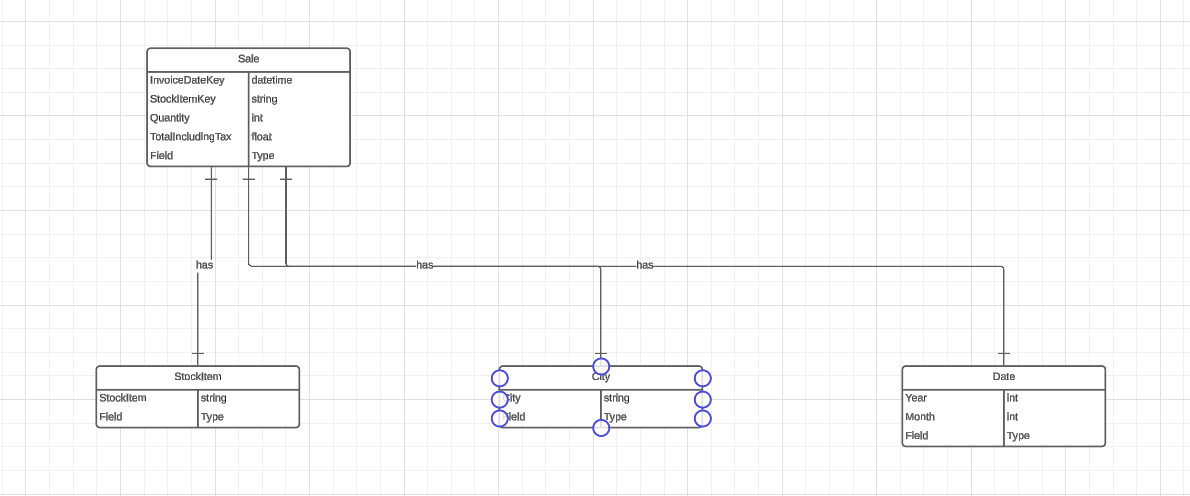

### **TOP 2:**

### **Q7 (Medium)**
Write a query that displays the total sales and total number of customers for each product category, broken down by year.

**Tables Involved:** FactInternetSales, DimDate, DimProduct, DimProductCategory



In [155]:
USE AdventureWorksDW2017
;WITH CategorySales AS (
    SELECT 
        YEAR(d.FullDateAlternateKey) AS Year, 
        pc.EnglishProductCategoryName AS Category, 
        SUM(fis.SalesAmount) AS TotalSales, 
        COUNT(DISTINCT fis.CustomerKey) AS NumberOfCustomers
    FROM FactInternetSales fis
    JOIN DimDate d ON fis.OrderDateKey = d.DateKey
    JOIN DimProduct p ON fis.ProductKey = p.ProductKey
    JOIN DimProductCategory pc ON p.ProductSubcategoryKey = pc.ProductCategoryKey
    GROUP BY YEAR(d.FullDateAlternateKey), pc.EnglishProductCategoryName
)
SELECT * FROM (
    SELECT 
        Year, 
        Category, 
        TotalSales, 
        NumberOfCustomers,
        RANK() OVER (PARTITION BY Year ORDER BY TotalSales DESC) AS Rank
    FROM CategorySales
) RankedSales WHERE Rank <= 3;


(10 rows affected)

Total execution time: 00:00:00.113

Year Category TotalSales NumberOfCustomers Rank 2010 Components 26446.0864 9 1 2010 Bikes 16974.95 5 2 2011 Components 5743161.1249 1821 1 2011 Bikes 1332364.8042 395 2 2012 Components 3554883.925 2154 1 2012 Bikes 2263420.5302 1093 2 2012 Clothing 21390.87 13 3 2013 Bikes 6339999.28 3466 1 2013 Components 5196092.90 4080 2 2013 Clothing 3823410.18 2131 3

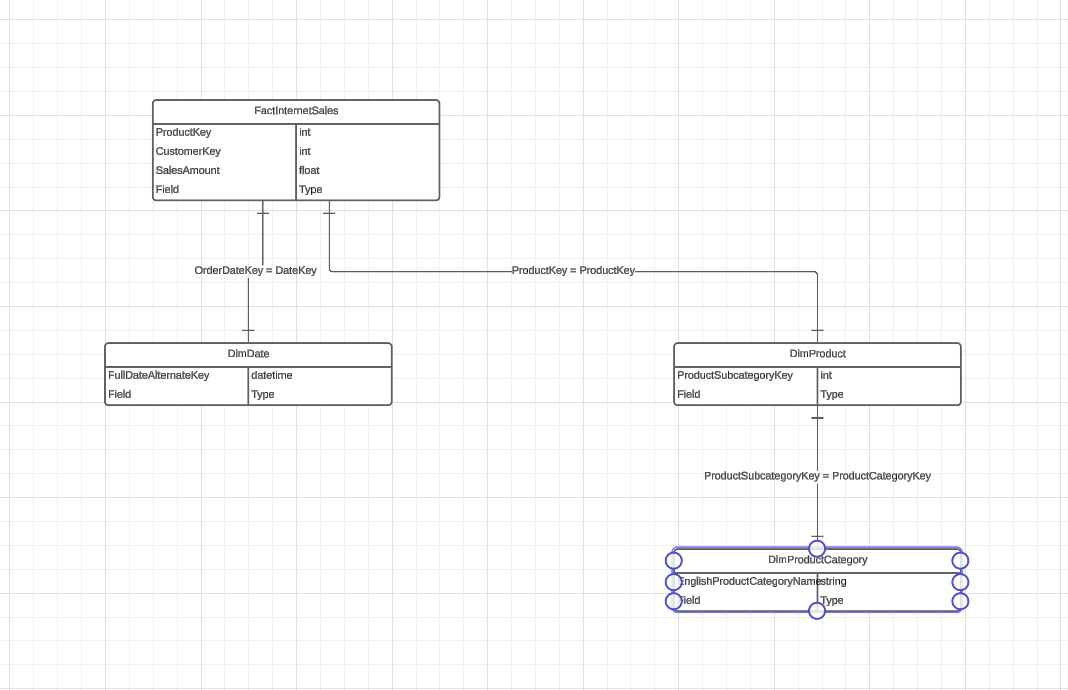

### **TOP 3:**

### **Q19 (Medium)**

Write a query that calculates the total revenue, profit, and number of transactions for each payment method across different customer categories within the last recorded fiscal year. 

**Tables Involved:** Fact.Transaction, Dimension.Date, Dimension.Payment Method, Dimension.Customer

In [101]:
USE WideWorldImportersDW;
SELECT TOP 3 pm.[Payment Method], cust.Category, SUM(t.[Total Including Tax]) AS TotalRevenue, COUNT(*) AS Transactions 
FROM Fact.[Transaction] t 
JOIN Dimension.Date d ON t.[Date Key] = d.Date 
JOIN Dimension.[Payment Method] pm ON t.[Payment Method Key] = pm.[Payment Method Key] 
JOIN Dimension.Customer cust ON t.[Customer Key] = cust.[Customer Key]
WHERE d.[Fiscal Year] = YEAR(GETDATE()) - 8
GROUP BY pm.[Payment Method], cust.Category
ORDER BY TotalRevenue DESC;



(3 rows affected)

Total execution time: 00:00:00.034

Payment Method Category TotalRevenue Transactions Unknown Novelty Shop 21850223.49 7813 Unknown N/A 13951029.40 4983 EFT N/A -19818576.83 5075

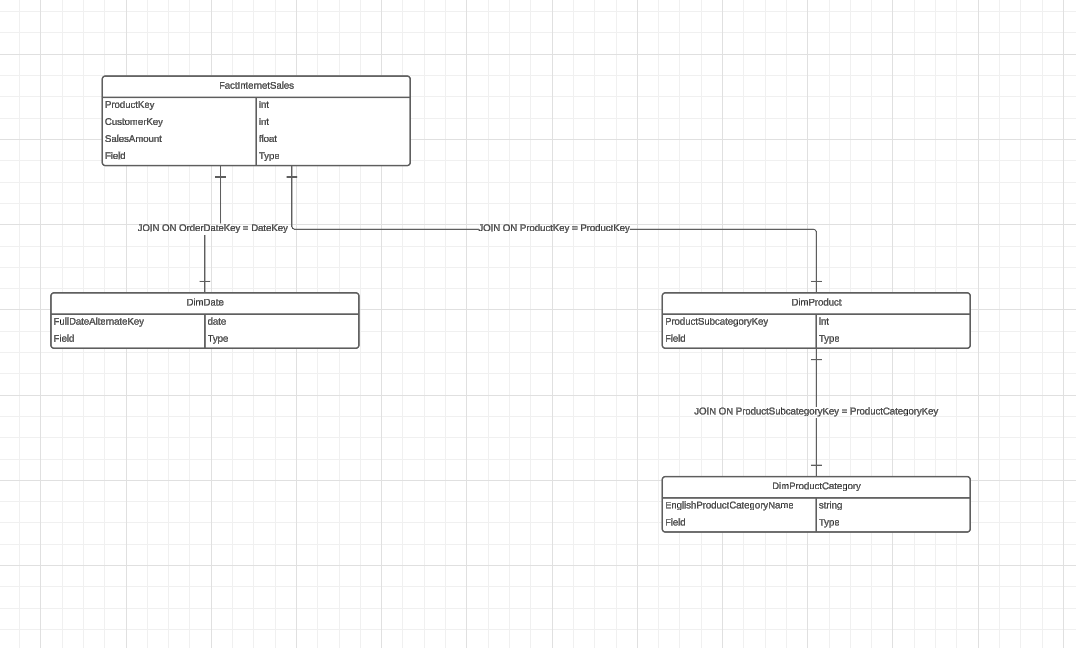

### **WORST 3 Problems**

### **Worst 1:**

### **Q18 (Medium)**

Write a query that provides the average time between order placement and picking date across different sales territories, also highlighting the fastest and slowest moving stock items.

**Tables Involved:** Fact.Order, Dimension.Date, Dimension.Stock Item, Dimension.City


In [84]:
USE WideWorldImportersDW
;WITH OrderTime AS (
    SELECT c.[Sales Territory], si.[Stock Item], AVG(DATEDIFF(day, d1.Date, d2.Date)) AS AvgDays 
    FROM Fact.[Order] o 
    JOIN Dimension.City c ON o.[City Key] = c.[City Key]
    JOIN Dimension.Date d1 ON o.[Order Date Key] = d1.Date 
    JOIN Dimension.Date d2 ON o.[Picked Date Key] = d2.Date 
    JOIN Dimension.[Stock Item] si ON o.[Stock Item Key] = si.[Stock Item Key]
    GROUP BY c.[Sales Territory], si.[Stock Item]
)
SELECT * FROM (
    SELECT *, RANK() OVER (PARTITION BY [Sales Territory] ORDER BY AvgDays DESC) AS Rank 
    FROM OrderTime
) Ranked 
WHERE Rank <= 3;


(27 rows affected)

Total execution time: 00:00:00.226

Sales Territory Stock Item AvgDays Rank External "The Gu" red shirt XML tag t-shirt (White) XS 84 1 External Shipping carton (Brown) 305x305x305mm 79 2 External "The Gu" red shirt XML tag t-shirt (White) 5XL 66 3 Far West "The Gu" red shirt XML tag t-shirt (White) 5XL 96 1 Far West "The Gu" red shirt XML tag t-shirt (Black) XL 69 2 Far West "The Gu" red shirt XML tag t-shirt (White) M 66 3 Great Lakes Tape dispenser (Red) 77 1 Great Lakes "The Gu" red shirt XML tag t-shirt (Black) XL 69 2 Great Lakes "The Gu" red shirt XML tag t-shirt (Black) 4XL 62 3 Mideast Black and orange glass with care despatch tape 48mmx75m 69 1 Mideast "The Gu" red shirt XML tag t-shirt (Black) XL 61 2 Mideast Tape dispenser (Red) 59 3 New England "The Gu" red shirt XML tag t-shirt (White) M 90 1 New England "The Gu" red shirt XML tag t-shirt (Black) XL 82 2 New England "The Gu" red shirt XML tag t-shirt (White) 5XL 77 3 Plains "The Gu" red shirt XML tag t-shirt (White) 5XL 74 1 Plains Tape dispenser (Red) 70 2 Plains "The Gu" red shirt XML tag t-shirt (White) XS 68 3 Rocky Mountain Black and orange glass with care despatch tape 48mmx75m 100 1 Rocky Mountain Tape dispenser (Red) 82 2 Rocky Mountain "The Gu" red shirt XML tag t-shirt (Black) XL 57 3 Southeast Tape dispenser (Red) 72 1 Southeast "The Gu" red shirt XML tag t-shirt (Black) XL 63 2 Southeast "The Gu" red shirt XML tag t-shirt (White) 5XL 58 3 Southwest Tape dispenser (Red) 93 1 Southwest "The Gu" red shirt XML tag t-shirt (White) XS 68 2 Southwest "The Gu" red shirt XML tag t-shirt (Black) XL 67 3

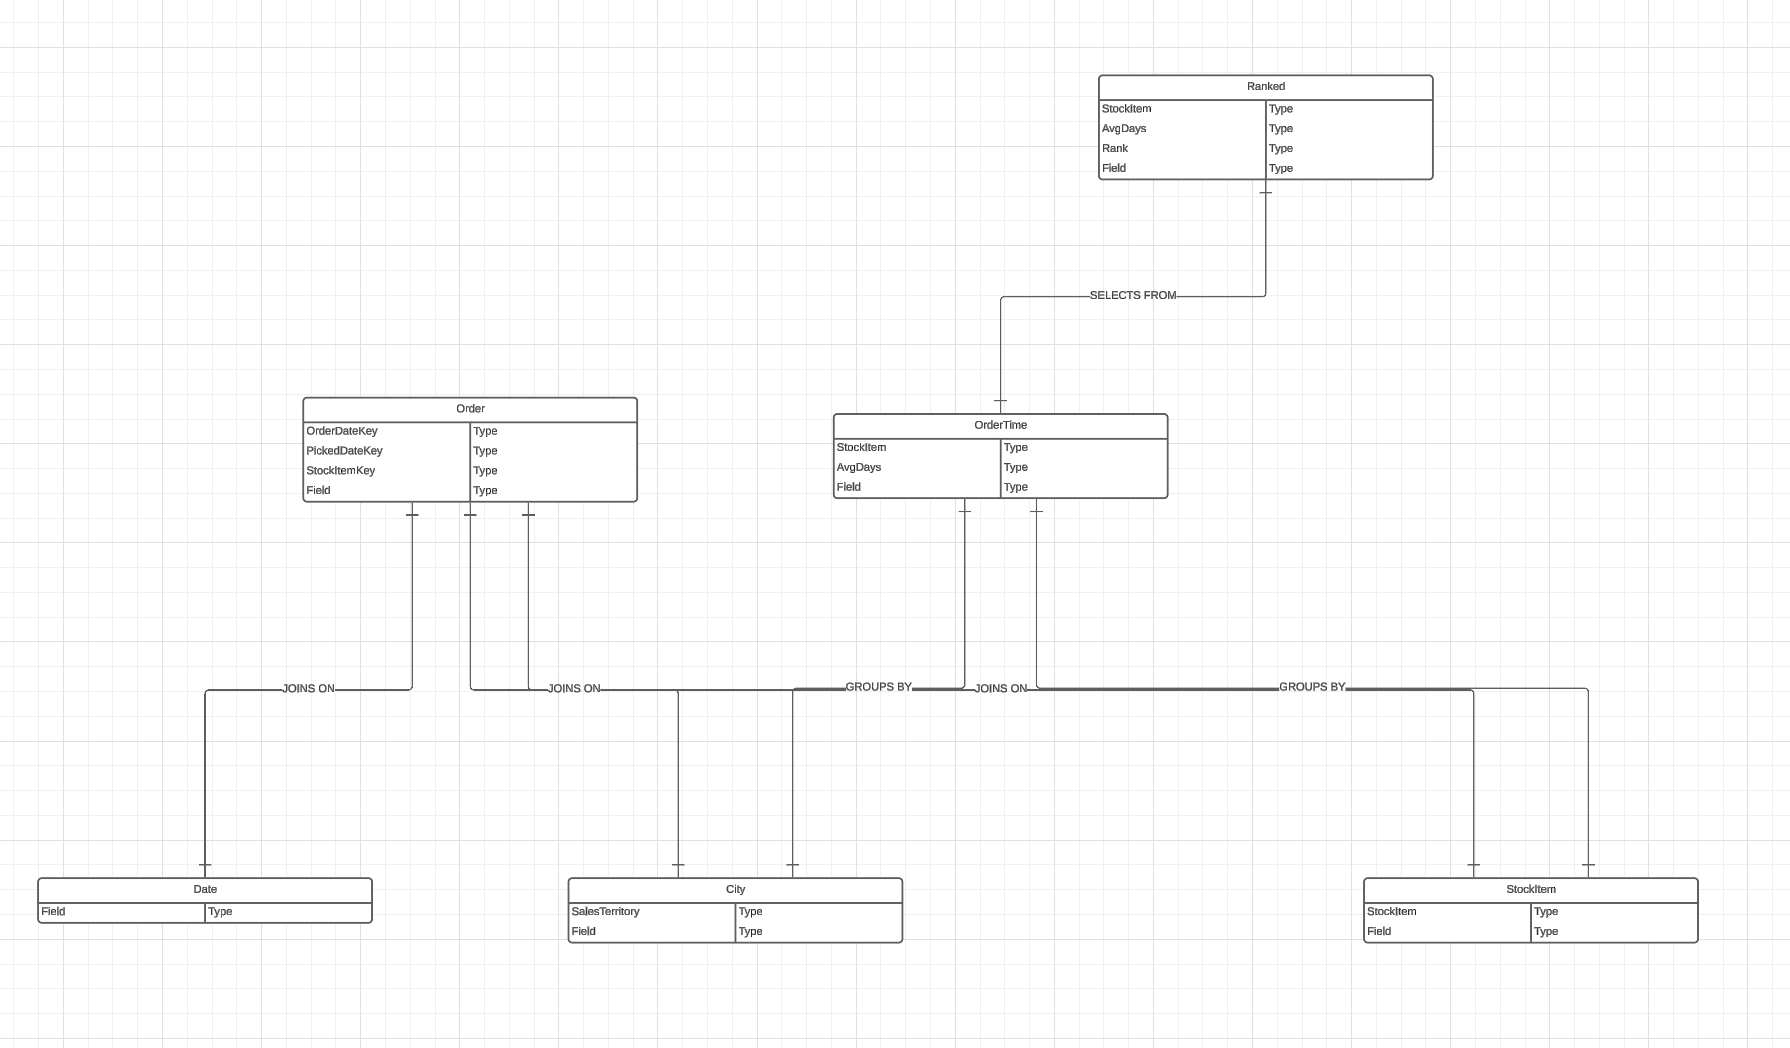

### **Worst 2:**

### **Q10(Medium)**

Write a query that calculates the monthly sales performance of each product category, including total sales and number of units sold.

**Tables Involved:** Sales.OrderDetail, Sales.Order, Production.Product, Production.Category 


In [38]:
USE Northwinds2022TSQLV7
SELECT YEAR(o.OrderDate) AS Year, MONTH(o.OrderDate) AS Month, c.CategoryName, 
       SUM(od.UnitPrice * od.Quantity * (1 - od.DiscountPercentage)) AS TotalSales,
       SUM(od.Quantity) AS UnitsSold
FROM Sales.OrderDetail od
JOIN Sales.[Order] o ON od.OrderId = o.OrderId
JOIN Production.Product p ON od.ProductId = p.ProductId
JOIN Production.Category c ON p.CategoryId = c.CategoryId
GROUP BY YEAR(o.OrderDate), MONTH(o.OrderDate), c.CategoryName
ORDER BY Year, Month, c.CategoryName;


(184 rows affected)

Total execution time: 00:00:00.075

Year Month CategoryName TotalSales UnitsSold 2014 7 Beverages 3182.5000000 272 2014 7 Condiments 1878.2000000 139 2014 7 Confections 5775.1500000 245 2014 7 Dairy Products 6838.3400000 304 2014 7 Grains/Cereals 1256.8600000 83 2014 7 Meat/Poultry 2661.7200000 76 2014 7 Produce 3868.8000000 156 2014 7 Seafood 2400.3250000 187 2014 8 Beverages 4866.8800000 347 2014 8 Condiments 2296.6000000 154 2014 8 Confections 5006.7750000 170 2014 8 Dairy Products 4761.7000000 250 2014 8 Grains/Cereals 270.6000000 11 2014 8 Meat/Poultry 3495.6600000 111 2014 8 Produce 804.3200000 22 2014 8 Seafood 3982.7400000 257 2014 9 Beverages 5088.4000000 285 2014 9 Condiments 1813.6000000 110 2014 9 Confections 6337.0000000 248 2014 9 Dairy Products 3857.6000000 140 2014 9 Grains/Cereals 819.2000000 32 2014 9 Meat/Poultry 4291.0000000 100 2014 9 Produce 1164.8000000 32 2014 9 Seafood 3009.8000000 177 2014 10 Beverages 8187.3600000 301 2014 10 Condiments 4124.3200000 183 2014 10 Confections 3528.5950000 187 2014 10 Dairy Products 7260.4300000 367 2014 10 Grains/Cereals 2460.5600000 156 2014 10 Meat/Poultry 3651.3000000 153 2014 10 Produce 2491.1600000 81 2014 10 Seafood 5812.0000000 310 2014 11 Beverages 17162.0600000 332 2014 11 Condiments 6290.2250000 294 2014 11 Confections 3165.3800000 267 2014 11 Dairy Products 7309.7200000 372 2014 11 Grains/Cereals 2506.7000000 139 2014 11 Meat/Poultry 5757.1800000 201 2014 11 Produce 2365.8800000 63 2014 11 Seafood 1042.9000000 67 2014 12 Beverages 9431.8000000 305 2014 12 Condiments 1497.4400000 82 2014 12 Confections 5872.6500000 240 2014 12 Dairy Products 10952.6600000 653 2014 12 Grains/Cereals 2194.0000000 128 2014 12 Meat/Poultry 8956.8000000 309 2014 12 Produce 3190.8200000 195 2014 12 Seafood 3143.4600000 288 2015 1 Beverages 21904.1600000 330 2015 1 Condiments 5252.0750000 271 2015 1 Confections 9128.1150000 623 2015 1 Dairy Products 9066.4000000 448 2015 1 Grains/Cereals 4547.8000000 232 2015 1 Meat/Poultry 6842.8500000 219 2015 1 Produce 2704.9200000 124 2015 1 Seafood 1811.7500000 154 2015 2 Beverages 2845.8400000 220 2015 2 Condiments 6128.8600000 393 2015 2 Confections 6978.8750000 425 2015 2 Dairy Products 5584.8400000 248 2015 2 Grains/Cereals 4693.7000000 216 2015 2 Meat/Poultry 7561.0200000 380 2015 2 Produce 2679.6000000 103 2015 2 Seafood 2010.9000000 147 2015 3 Beverages 10636.8800000 471 2015 3 Condiments 1645.1350000 150 2015 3 Confections 3209.9250000 265 2015 3 Dairy Products 9728.9000000 311 2015 3 Grains/Cereals 3167.6000000 174 2015 3 Meat/Poultry 2998.4800000 102 2015 3 Produce 3676.8000000 122 2015 3 Seafood 3483.5000000 175 2015 4 Beverages 7074.3500000 268 2015 4 Condiments 5544.4000000 259 2015 4 Confections 11538.6125000 394 2015 4 Dairy Products 5775.6000000 231 2015 4 Grains/Cereals 6544.4000000 240 2015 4 Meat/Poultry 6613.4400000 93 2015 4 Produce 5893.8600000 186 2015 4 Seafood 4048.2900000 241 2015 5 Beverages 15422.2500000 322 2015 5 Condiments 5453.0200000 300 2015 5 Confections 7689.8250000 291 2015 5 Dairy Products 10435.5750000 494 2015 5 Grains/Cereals 2267.2500000 149 2015 5 Meat/Poultry 3395.5100000 136 2015 5 Produce 3099.6000000 71 2015 5 Seafood 6018.2600000 401 2015 6 Beverages 3485.4250000 313 2015 6 Condiments 1855.2750000 95 2015 6 Confections 2174.8850000 107 2015 6 Dairy Products 8455.8000000 405 2015 6 Grains/Cereals 6345.8500000 292 2015 6 Meat/Poultry 4923.5000000 130 2015 6 Produce 5823.7000000 149 2015 6 Seafood 3298.3675000 144 2015 7 Beverages 7889.2250000 327 2015 7 Condiments 5519.8350000 300 2015 7 Confections 6462.5975000 210 2015 7 Dairy Products 12387.3500000 374 2015 7 Grains/Cereals 4457.8000000 243 2015 7 Meat/Poultry 4806.3000000 179 2015 7 Produce 1650.0000000 55 2015 7 Seafood 7847.7500000 366 2015 8 Beverages 5836.9250000 334 2015 8 Condiments 4220.0250000 206 2015 8 Confections 7105.6300000 335 2015 8 Dairy Products 6826.5500000 256 2015 8 Grains/Cereals 5415.2500000 204 2015 8 Meat/Poultry 4888.2400000 105 2015 8 Produce 4284.0000000 

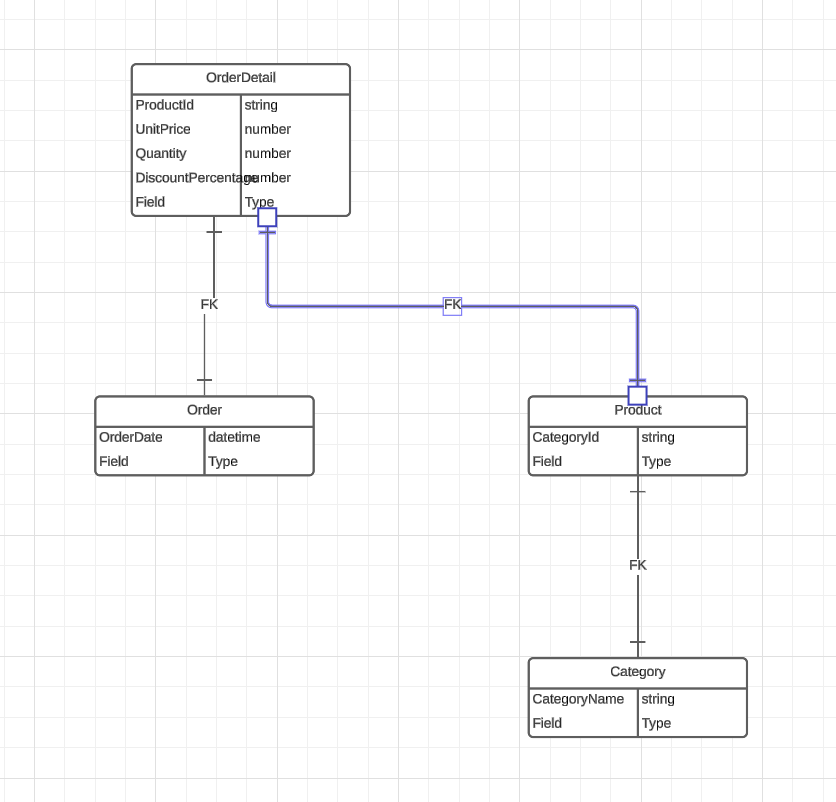

### **Worst 3:**

### **Q1 (Complex)**

Write a query that provides the average time between order placement and picking date across different sales territories, also highlighting the fastest and slowest moving stock items.

**Tables Involved:** Fact.Order, Dimension.Date, Dimension.Stock Item, Dimension.City


In [29]:
USE AdventureWorks2017
SELECT 
    pc.Name AS ProductCategory,
    YEAR(soh.OrderDate) AS OrderYear, 
    MONTH(soh.OrderDate) AS OrderMonth,
    SUM(sod.LineTotal) AS TotalSalesRevenue,
    COUNT(DISTINCT soh.SalesOrderID) AS NumberOfOrders,
    SUM(sod.LineTotal) / COUNT(DISTINCT soh.SalesOrderID) AS AvgOrderValue
FROM 
    Sales.SalesOrderDetail sod
    JOIN Sales.SalesOrderHeader soh ON sod.SalesOrderID = soh.SalesOrderID
    JOIN Production.Product p ON sod.ProductID = p.ProductID
    JOIN Production.ProductSubcategory psc ON p.ProductSubcategoryID = psc.ProductSubcategoryID
    JOIN Production.ProductCategory pc ON psc.ProductCategoryID = pc.ProductCategoryID
GROUP BY 
    pc.Name, 
    YEAR(soh.OrderDate),
    MONTH(soh.OrderDate)
ORDER BY
    pc.Name,
    OrderYear,
    OrderMonth;

(141 rows affected)

Total execution time: 00:00:00.767

ProductCategory OrderYear OrderMonth TotalSalesRevenue NumberOfOrders AvgOrderValue Accessories 2011 5 1695.666000 15 113.044400 Accessories 2011 7 3593.197000 27 133.081370 Accessories 2011 8 5187.930500 40 129.698262 Accessories 2011 10 9758.571108 53 184.123983 Accessories 2011 12 585.408500 6 97.568083 Accessories 2012 1 4360.284000 39 111.802153 Accessories 2012 2 1776.412000 13 136.647076 Accessories 2012 3 5577.839264 29 192.339284 Accessories 2012 4 4279.538000 23 186.066869 Accessories 2012 5 10477.604940 37 283.178511 Accessories 2012 6 18552.392664 60 309.206544 Accessories 2012 7 15329.326483 45 340.651699 Accessories 2012 8 9160.772260 29 315.888698 Accessories 2012 9 12582.241228 39 322.621569 Accessories 2012 10 10053.532375 36 279.264788 Accessories 2012 11 4726.827500 23 205.514239 Accessories 2012 12 5563.050000 32 173.845312 Accessories 2013 1 5333.279436 25 213.331177 Accessories 2013 2 9635.418016 31 310.819936 Accessories 2013 3 12388.159364 44 281.549076 Accessories 2013 4 10630.745485 33 322.143802 Accessories 2013 5 32083.044337 58 553.155936 Accessories 2013 6 69677.274677 480 145.160988 Accessories 2013 7 105995.227824 1379 76.863834 Accessories 2013 8 84332.947256 1439 58.605244 Accessories 2013 9 92082.911092 1425 64.619586 Accessories 2013 10 96479.770206 1540 62.649201 Accessories 2013 11 79248.962000 1643 48.234304 Accessories 2013 12 77136.911268 1573 49.038087 Accessories 2014 1 78746.990580 1669 47.182139 Accessories 2014 2 54655.908000 1430 38.220914 Accessories 2014 3 133808.457847 1822 73.440426 Accessories 2014 4 69061.548000 1732 39.873872 Accessories 2014 5 104786.014716 1821 57.543116 Accessories 2014 6 32728.720000 834 39.243069 Bikes 2011 5 467709.136900 42 11135.931830 Bikes 2011 6 458910.824800 141 3254.686700 Bikes 2011 7 1919445.211504 228 8418.619348 Bikes 2011 8 2317589.595696 245 9459.549370 Bikes 2011 9 502073.845800 157 3197.922584 Bikes 2011 10 4258153.847060 315 13517.948720 Bikes 2011 11 737839.821400 230 3207.999223 Bikes 2011 12 1283924.640840 228 5631.248424 Bikes 2012 1 3804873.101600 330 11529.918489 Bikes 2012 2 1406374.232080 217 6480.987244 Bikes 2012 3 2789357.610252 298 9360.260437 Bikes 2012 4 1481915.874632 262 5656.167460 Bikes 2012 5 2482840.922950 278 8931.082456 Bikes 2012 6 3178084.917277 362 8779.240102 Bikes 2012 7 2689039.316117 353 7617.675116 Bikes 2012 8 1839276.482410 268 6862.971949 Bikes 2012 9 2895168.422908 327 8853.726063 Bikes 2012 10 2092787.283116 294 7118.324092 Bikes 2012 11 1726871.093577 376 4592.742270 Bikes 2012 12 2598926.587776 356 7300.355583 Bikes 2013 1 1883815.417216 377 4996.857870 Bikes 2013 2 1961526.988255 308 6368.594117 Bikes 2013 3 2878097.804651 414 6951.927064 Bikes 2013 4 2086341.535542 406 5138.772255 Bikes 2013 5 2501836.699147 415 6028.522166 Bikes 2013 6 3946088.112786 646 6108.495530 Bikes 2013 7 3680266.388713 638 5768.442615 Bikes 2013 8 2843413.249354 692 4108.978684 Bikes 2013 9 3778234.427399 753 5017.575600 Bikes 2013 10 4053938.759642 889 4560.111090 Bikes 2013 11 3010755.294584 1087 2769.784079 Bikes 2013 12 3642514.683923 940 3875.015621 Bikes 2014 1 3892842.450999 1038 3750.329914 Bikes 2014 2 1254321.672800 799 1569.864421 Bikes 2014 3 6044367.646611 1243 4862.725379 Bikes 2014 4 1696566.240000 1086 1562.215690 Bikes 2014 5 4565082.564414 1330 3432.392905 Clothing 2011 5 2875.153600 24 119.798066 Clothing 2011 7 7038.577834 50 140.771556 Clothing 2011 8 8722.076950 66 132.152681 Clothing 2011 10 15740.526862 102 154.318890 Clothing 2011 12 1655.140100 20 82.757005 Clothing 2012 1 10048.189658 75 133.975862 Clothing 2012 2 3652.617900 26 140.485303 Clothing 2012 3 9487.168112 58 163.571864 Clothing 2012 4 7108.083400 44 161.547350 Clothing 2012 5 73171.758796 53 1380.599222 Clothing 2012 6 103232.548486 86 1200.378470 Clothing 2012 7 86128.837218 69 1248.244017 Clothing 2012 8 54138.162395 51 1061.532595 Clothing 2012 9 72378.728349 90 804.208092 Clothing 2012 10 64585.918426 72 897.026644 Clothing 2012 

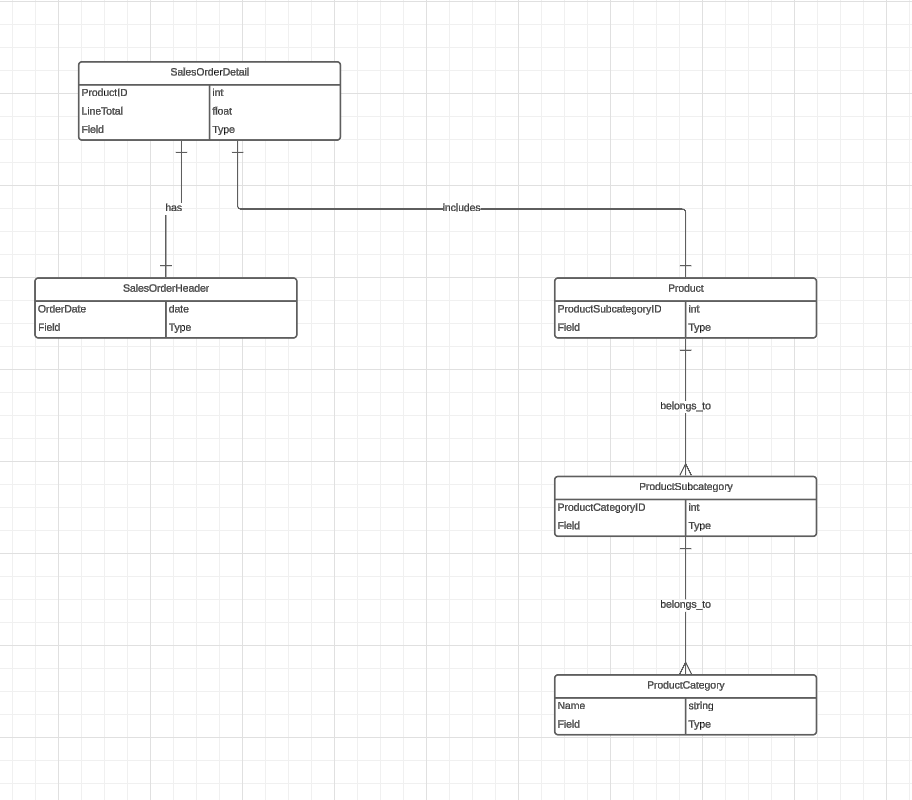

## **Remainder**

### **Q2(Medium)**

Write a query that lists each employee, their manager, and their total sales for the current year.

**Tables Involved:** HumanResources.Employee, Person.Person, Sales.SalesOrderHeader, Sales.SalesOrderDetail


In [147]:
USE AdventureWorks2017

;WITH EmployeeSales AS (
    SELECT e.BusinessEntityID, SUM(sod.LineTotal) AS TotalSales
    FROM HumanResources.Employee e
    JOIN Sales.SalesOrderHeader soh ON e.BusinessEntityID = soh.SalesPersonID
    JOIN Sales.SalesOrderDetail sod ON soh.SalesOrderID = sod.SalesOrderID
    WHERE YEAR(soh.OrderDate) = YEAR(GETDATE())
    GROUP BY e.BusinessEntityID
), EmployeeManager AS (
    SELECT e.BusinessEntityID, e.ManagerID
    FROM HumanResources.Employee e
)
SELECT emp.BusinessEntityID AS EmployeeID,
    p.FirstName + ' ' + p.LastName AS EmployeeName,
    mgr.FirstName + ' ' + mgr.LastName AS ManagerName,
    es.TotalSales
FROM EmployeeManager em
JOIN Person.Person p ON em.BusinessEntityID = p.BusinessEntityID
LEFT JOIN EmployeeManager mgrm ON em.ManagerID = mgrm.BusinessEntityID
LEFT JOIN Person.Person mgr ON mgrm.BusinessEntityID = mgr.BusinessEntityID
LEFT JOIN EmployeeSales es ON em.BusinessEntityID = es.BusinessEntityID
ORDER BY TotalSales DESC;




: Msg 10347, Level 16, State 1, Procedure Employee, Line 1
Common Language Runtime(CLR) is not enabled on this instance.

: Msg 474, Level 16, State 0, Line 3
Unable to load the computed column definitions for table "HumanResources.Employee".

Total execution time: 00:00:00.004

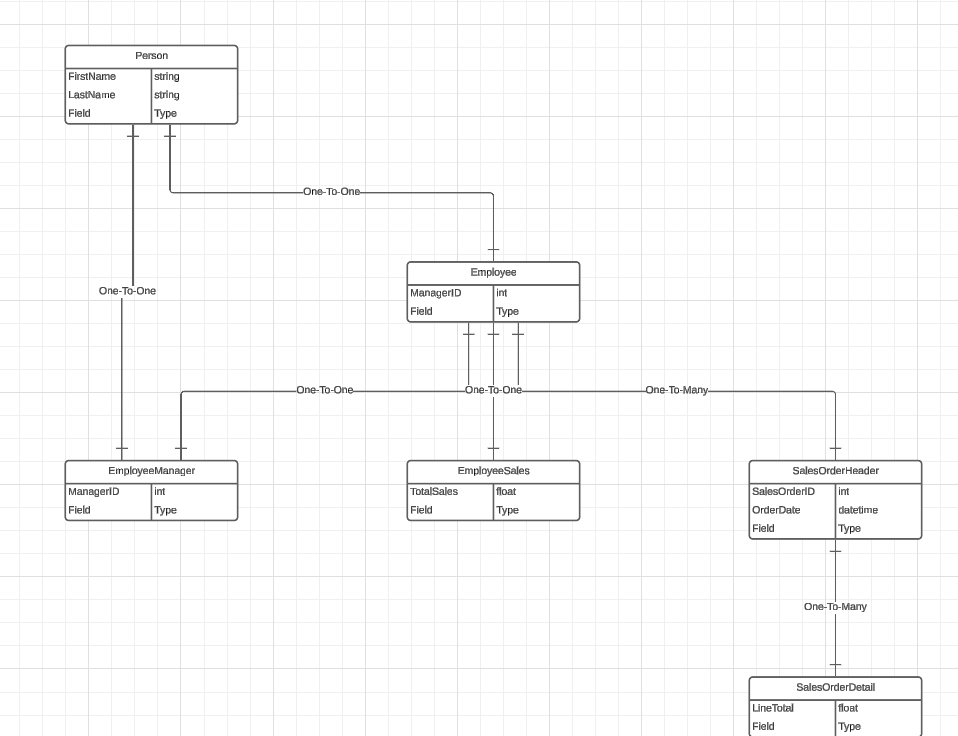

### **Q3(Medium)**

Write a query that shows the monthly trend of the quantity of products sold for the top 3 products with the highest sales in the last recorded yaer

**Tables Involved:** Sales.SalesOrderDetail, Sales.SalesOrderHeader, Production.Product

In [141]:
USE AdventureWorks2017;

WITH TopProducts AS (
    SELECT TOP 3 sod.ProductID, SUM(sod.LineTotal) AS TotalSales
    FROM Sales.SalesOrderDetail AS sod
    JOIN Sales.SalesOrderHeader AS soh ON sod.SalesOrderID = soh.SalesOrderID
    WHERE soh.OrderDate >= DATEADD(YEAR, -10, GETDATE())
    GROUP BY sod.ProductID
    ORDER BY TotalSales DESC
),
MonthlySales AS (
    SELECT tp.ProductID, YEAR(soh.OrderDate) AS Year, MONTH(soh.OrderDate) AS Month, SUM(sod.OrderQty) AS QuantitySold
    FROM Sales.SalesOrderDetail AS sod
    JOIN Sales.SalesOrderHeader AS soh ON sod.SalesOrderID = soh.SalesOrderID
    JOIN TopProducts AS tp ON sod.ProductID = tp.ProductID
    WHERE soh.OrderDate >= DATEADD(YEAR, -10, GETDATE())
    GROUP BY tp.ProductID, YEAR(soh.OrderDate), MONTH(soh.OrderDate)
),
RankedMonthlySales AS (
    SELECT *, ROW_NUMBER() OVER (PARTITION BY Year, Month ORDER BY QuantitySold DESC) AS Rank
    FROM MonthlySales
)
SELECT p.Name AS ProductName, rms.Year, rms.Month, rms.QuantitySold
FROM RankedMonthlySales AS rms
JOIN Production.Product AS p ON rms.ProductID = p.ProductID
ORDER BY Year, Month, Rank;


(9 rows affected)

Total execution time: 00:00:00.136

ProductName Year Month QuantitySold Mountain-200 Black, 38 2014 3 128 Mountain-200 Silver, 38 2014 3 93 Mountain-200 Black, 42 2014 3 84 Mountain-200 Black, 38 2014 4 52 Mountain-200 Silver, 38 2014 4 47 Mountain-200 Black, 42 2014 4 42 Mountain-200 Black, 38 2014 5 166 Mountain-200 Black, 42 2014 5 156 Mountain-200 Silver, 38 2014 5 146

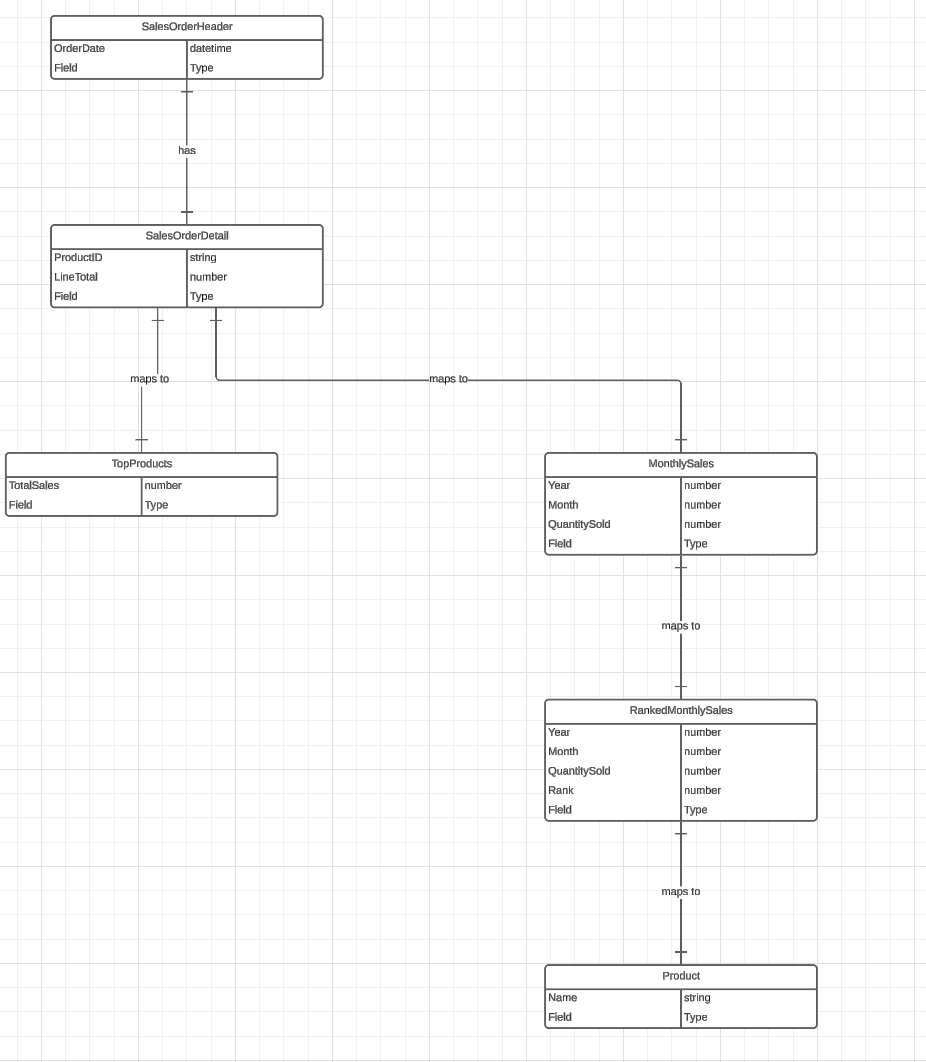

### **Q4(Medium)**

Write a query that provides the total hours worked per month by each employee, including overtime.
  
**Tables Involved:** HumanResources.Employee, HumanResources.EmployeeDepartmentHistory, HumanResources.Shift

In [153]:
USE AdventureWorks2017
SELECT 
    edh.BusinessEntityID,
    CONCAT(p.FirstName, ' ', p.LastName) AS EmployeeName,
    YEAR(edh.StartDate) AS Year,
    MONTH(edh.StartDate) AS Month,
    SUM(DATEDIFF(HOUR, s.StartTime, s.EndTime)) AS TotalHoursWorked
FROM 
    HumanResources.EmployeeDepartmentHistory edh
JOIN 
    HumanResources.[Employee] e ON edh.BusinessEntityID = e.BusinessEntityID
JOIN 
    Person.Person p ON e.BusinessEntityID = p.BusinessEntityID
JOIN 
    HumanResources.Shift s ON edh.ShiftID = s.ShiftID
GROUP BY 
    edh.BusinessEntityID, 
    p.FirstName, 
    p.LastName, 
    YEAR(edh.StartDate), 
    MONTH(edh.StartDate);




: Msg 10347, Level 16, State 1, Procedure Employee, Line 1
Common Language Runtime(CLR) is not enabled on this instance.

: Msg 474, Level 16, State 0, Line 2
Unable to load the computed column definitions for table "HumanResources.Employee".

Total execution time: 00:00:00.006

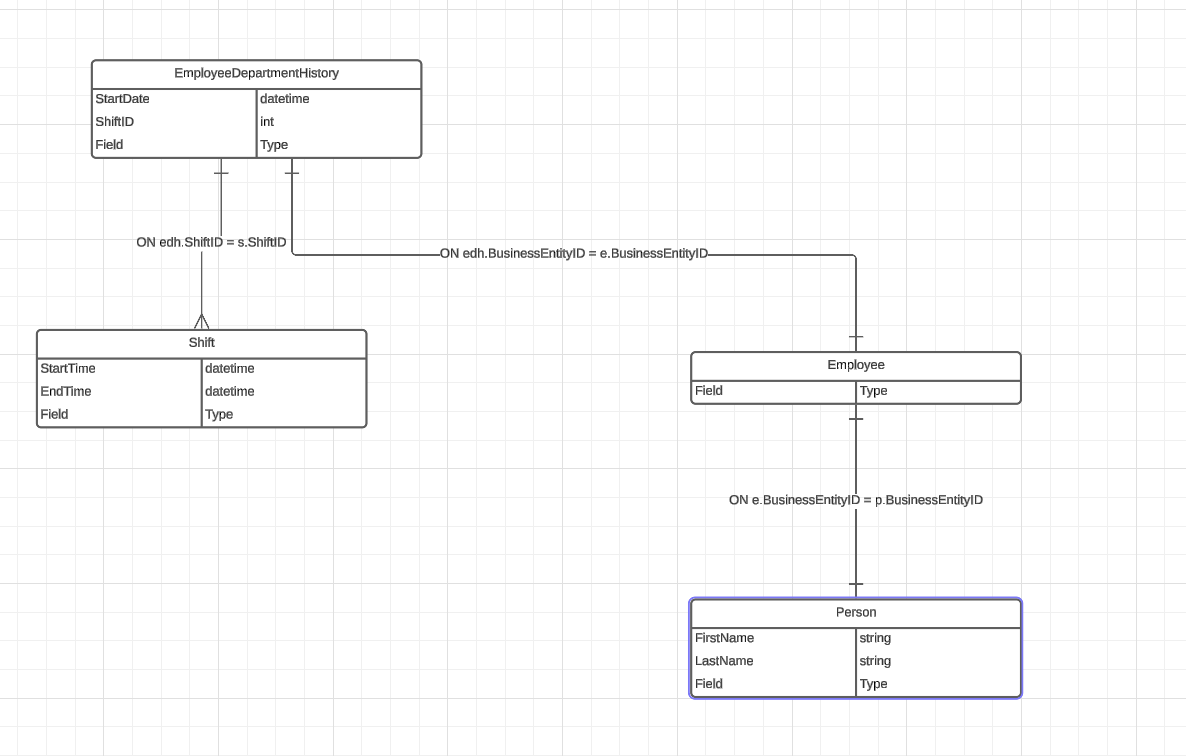

**Q5 (Complex)**

Write a query that calculates the year-over-year growth in sales by product category and subcategory.

**Tables Involved:** FactInternetSales, DimDate, DimProduct, DimProductSubcategory, DimProductCategory



In [131]:
USE AdventureWorksDW2017
;WITH SalesData AS (
    SELECT 
        YEAR(d.FullDateAlternateKey) AS Year, 
        pc.EnglishProductCategoryName AS Category, 
        psc.EnglishProductSubcategoryName AS Subcategory, 
        SUM(fis.SalesAmount) AS TotalSales
    FROM FactInternetSales fis
    JOIN DimDate d ON fis.OrderDateKey = d.DateKey
    JOIN DimProduct p ON fis.ProductKey = p.ProductKey
    JOIN DimProductSubcategory psc ON p.ProductSubcategoryKey = psc.ProductSubcategoryKey
    JOIN DimProductCategory pc ON psc.ProductCategoryKey = pc.ProductCategoryKey
    GROUP BY YEAR(d.FullDateAlternateKey), pc.EnglishProductCategoryName, psc.EnglishProductSubcategoryName
)
SELECT 
    Year, 
    Category, 
    Subcategory, 
    TotalSales,
    LAG(TotalSales) OVER (PARTITION BY Category, Subcategory ORDER BY Year) AS PreviousYearSales,
    (TotalSales - LAG(TotalSales) OVER (PARTITION BY Category, Subcategory ORDER BY Year)) / LAG(TotalSales) OVER (PARTITION BY Category, Subcategory ORDER BY Year) * 100 AS Growth
FROM SalesData
ORDER BY Category, Subcategory, Year;


(49 rows affected)

Total execution time: 00:00:00.125

Year Category Subcategory TotalSales PreviousYearSales Growth 2013 Accessories Bike Racks 36960.00 NULL NULL 2014 Accessories Bike Racks 2400.00 36960.00 -93.50 2012 Accessories Bike Stands 159.00 NULL NULL 2013 Accessories Bike Stands 37683.00 159.00 23600.00 2014 Accessories Bike Stands 1749.00 37683.00 -95.35 2012 Accessories Bottles and Cages 280.62 NULL NULL 2013 Accessories Bottles and Cages 55008.82 280.62 19502.60 2014 Accessories Bottles and Cages 1508.75 55008.82 -97.25 2013 Accessories Cleaners 6908.55 NULL NULL 2014 Accessories Cleaners 310.05 6908.55 -95.51 2012 Accessories Fenders 109.90 NULL NULL 2013 Accessories Fenders 44443.56 109.90 40340.00 2014 Accessories Fenders 2066.12 44443.56 -95.35 2012 Accessories Helmets 909.74 NULL NULL 2013 Accessories Helmets 216028.26 909.74 23646.15 2014 Accessories Helmets 8397.60 216028.26 -96.11 2012 Accessories Hydration Packs 109.98 NULL NULL 2013 Accessories Hydration Packs 38932.92 109.98 35300.00 2014 Accessories Hydration Packs 1264.77 38932.92 -96.75 2012 Accessories Tires and Tubes 577.84 NULL NULL 2013 Accessories Tires and Tubes 232276.42 577.84 40097.35 2014 Accessories Tires and Tubes 12675.06 232276.42 -94.54 2010 Bikes Mountain Bikes 16974.95 NULL NULL 2011 Bikes Mountain Bikes 1332364.8042 16974.95 7749.00 2012 Bikes Mountain Bikes 2263420.5302 1332364.8042 69.87 2013 Bikes Mountain Bikes 6339999.28 2263420.5302 180.10 2010 Bikes Road Bikes 26446.0864 NULL NULL 2011 Bikes Road Bikes 5743161.1249 26446.0864 21616.48 2012 Bikes Road Bikes 3554883.925 5743161.1249 -38.10 2013 Bikes Road Bikes 5196092.90 3554883.925 46.16 2012 Bikes Touring Bikes 21390.87 NULL NULL 2013 Bikes Touring Bikes 3823410.18 21390.87 17774.02 2012 Clothing Caps 71.92 NULL NULL 2013 Clothing Caps 18870.01 71.92 26137.50 2014 Clothing Caps 746.17 18870.01 -96.04 2012 Clothing Gloves 73.47 NULL NULL 2013 Clothing Gloves 33379.87 73.47 45333.33 2014 Clothing Gloves 1567.36 33379.87 -95.30 2012 Clothing Jerseys 415.92 NULL NULL 2013 Clothing Jerseys 165574.11 415.92 39709.12 2014 Clothing Jerseys 6960.65 165574.11 -95.79 2013 Clothing Shorts 67400.37 NULL NULL 2014 Clothing Shorts 3919.44 67400.37 -94.18 2012 Clothing Socks 17.98 NULL NULL 2013 Clothing Socks 4863.59 17.98 26950.00 2014 Clothing Socks 224.75 4863.59 -95.37 2012 Clothing Vests 63.50 NULL NULL 2013 Clothing Vests 33718.50 63.50 53000.00 2014 Clothing Vests 1905.00 33718.50 -94.35

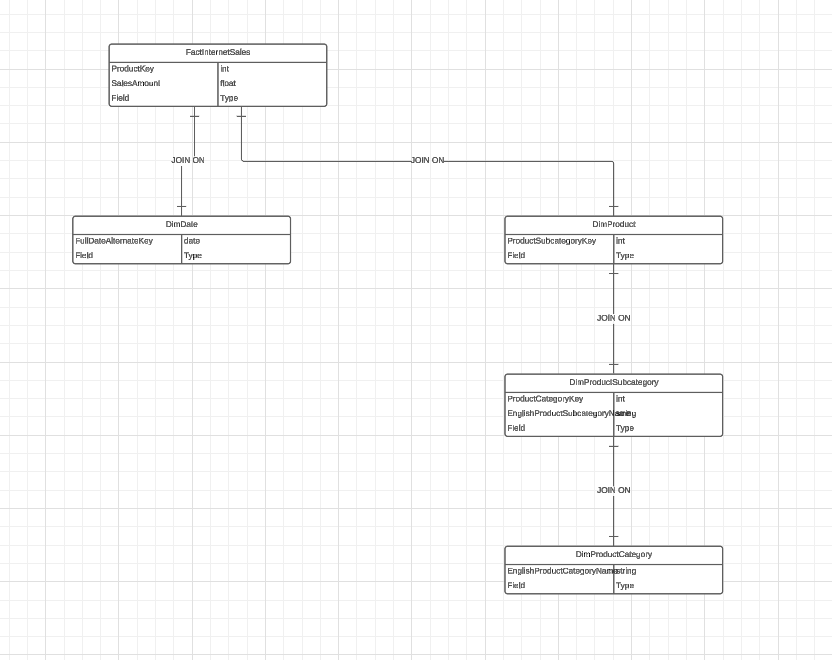

### **Q6 (Complex)**

Write a query that summarizes the total sales amount, number of orders, and average transaction value for each reseller, categorized by their geography and sales territory.

**Tables Involved:** FactResellerSales, DimReseller, DimGeography, DimSalesTerritory

In [129]:
USE AdventureWorksDW2017
SELECT 
    r.ResellerName, 
    g.City, 
    st.SalesTerritoryRegion, 
    SUM(frs.SalesAmount) AS TotalSales, 
    COUNT(frs.SalesOrderNumber) AS NumberOfOrders, 
    AVG(frs.SalesAmount) AS AvgTransactionValue
FROM FactResellerSales frs
JOIN DimReseller r ON frs.ResellerKey = r.ResellerKey
JOIN DimGeography g ON r.GeographyKey = g.GeographyKey
JOIN DimSalesTerritory st ON g.SalesTerritoryKey = st.SalesTerritoryKey
GROUP BY r.ResellerName, g.City, st.SalesTerritoryRegion;


(635 rows affected)

Total execution time: 00:00:00.087

ResellerName City SalesTerritoryRegion TotalSales NumberOfOrders AvgTransactionValue A Bike Store Seattle Northwest 85177.0812 73 1166.8093 A Great Bicycle Company Jefferson City Central 9055.2903 14 646.8064 A Typical Bike Shop Round Rock Southwest 83457.1089 75 1112.7614 Acceptable Sales & Service Calgary Canada 1258.3767 3 419.4589 Accessories Network Paris France 2165.7889 4 541.4472 Acclaimed Bicycle Company Mcdonough Southeast 7300.8288 11 663.7117 Ace Bicycle Supply Paris France 3749.1338 6 624.8556 Action Bicycle Specialists Woolston United Kingdom 321752.8352 179 1797.5018 Active Cycling Heath Northeast 1805.454 2 902.727 Active Life Toys Mississauga Canada 200013.366 173 1156.1466 Active Systems Duluth Central 639.9813 6 106.6635 Active Transport Inc. North Randall Northeast 88245.8727 71 1242.8996 Activity Center Crossville Southeast 42650.3954 73 584.2519 Advanced Bike Components Irving Southwest 361999.0583 394 918.7793 Aerobic Exercise Company Camarillo Southwest 2676.654 10 267.6654 Affordable Sports Equipment Lake Elsinore Southwest 311446.431 269 1157.7934 All Cycle Shop Bothell Northwest 3003.2028 28 107.2572 All Seasons Sports Supply Houston Southwest 7436.268 12 619.689 Alpine Ski House Elk Grove Southwest 11346.8814 14 810.4915 Alternative Vehicles Washougal Northwest 9127.8241 11 829.8021 Amalgamated Parts Shop Frankfurt am Main Germany 197327.5854 156 1264.9204 Another Bicycle Company Milwaukie Northwest 216653.6233 176 1230.9864 Area Bike Accessories Modesto Southwest 380454.0325 273 1393.6045 Area Sheet Metal Supply London United Kingdom 2446.3776 7 349.4825 Associated Bikes Salt Lake City Northwest 7780.3388 16 486.2711 Atypical Bike Company Paris France 381.192 2 190.596 Authentic Sales and Service London United Kingdom 1618.393 13 124.4917 Authorized Bike Sales and Rental Renton Northwest 148588.0527 82 1812.0494 Basic Bike Company Port Orchard Northwest 13137.3691 27 486.5692 Basic Sports Equipment Baldwin Park Southwest 58236.0665 64 909.9385 Beneficial Exercises and Activities San Antonio Southwest 1714.6947 5 342.9389 Best Cycle Store Offenbach Germany 272052.2258 177 1537.0182 Best o' Bikes Saint Louis Central 18520.2608 34 544.7135 Better Bike Shop Austell Southeast 422706.6026 359 1177.4557 Bicycle Accessories and Kits Lewiston Northwest 6587.3763 11 598.8523 Bicycle Exporters Essen Germany 30648.094 38 806.5287 Bicycle Lines Distributors Saint Louis Central 274395.5537 250 1097.5822 Bicycle Merchandise Warehouse Santa Monica Southwest 354805.2476 219 1620.1152 Bicycle Outfitters Cincinnati Northeast 182730.2472 116 1575.2607 Bicycle Warehouse Inc. Frankfurt am Main Germany 5426.7938 39 139.1485 Big Cycle Mall Killeen Southwest 12071.3124 11 1097.392 Big-Time Bike Store Camarillo Southwest 83292.2089 75 1110.5627 Bike Boutique Columbus Northeast 284876.0711 179 1591.4864 Bike Dealers Association Las Cruces Southwest 429050.873 432 993.1733 Bike Experts Salem Northwest 147784.2145 177 834.939 Bike Goods North Miami Beach Southeast 40221.1014 54 744.8352 Bike Part Wholesalers Sydney Australia 105520.8817 171 617.0811 Bike Products and Accessories Virginia Beach Southeast 4378.7209 22 199.0327 Bike Rims Company Biloxi Southeast 76463.8734 80 955.7984 Bike World San Ramon Southwest 94534.8418 93 1016.5036 Bikes and Motorbikes Toronto Canada 249295.5484 251 993.2093 Bikes for Kids and Adults Etobicoke Canada 29651.1109 44 673.8888 Bikes for Two Richmond Hill Canada 7777.8731 27 288.0693 Black Bicycle Company Branson Central 2472.3107 2 1236.1553 Blue Bicycle Company Monroe Central 3922.2795 5 784.4559 Blue-Ribbon Bike Company Saint Matthews Southeast 112651.9884 115 979.5825 Bold Bike Accessories Loveland Central 144735.2227 75 1929.8029 Brakes and Gears Tooele Northwest 877107.1923 298 2943.3127 Brightwork Company Las Vegas Northwest 184846.2361 114 1621.4582 Budget Bike Company Millington Southeast 1066.446 3 355.482 Budget Toy Store Lavender Bay Australia 145380.1284 131 1109.7719 Bulk Discount

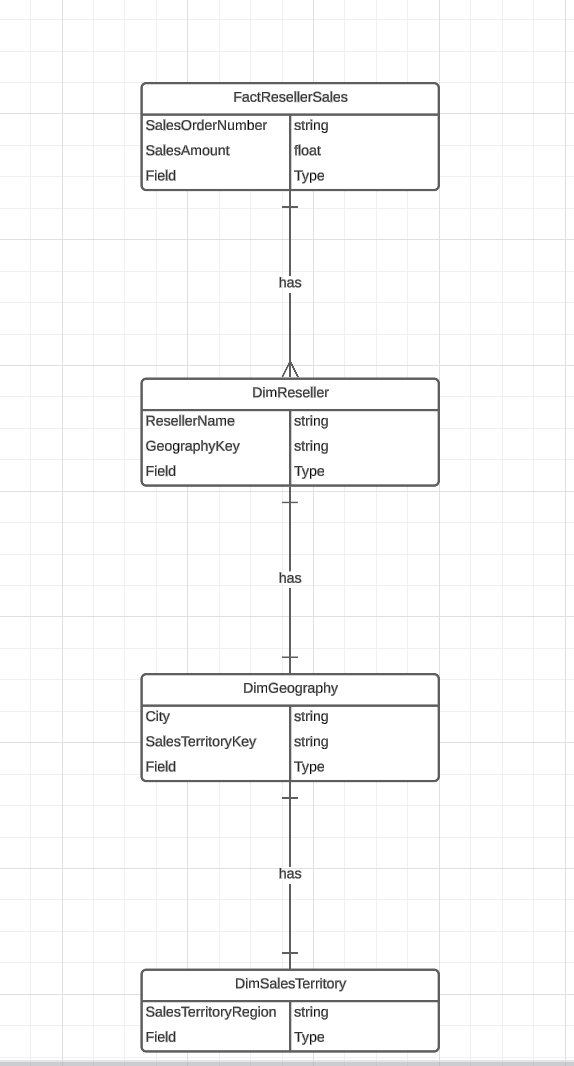

### **Q8 (Medium)**

Write a query that shows the trend of the average daily sales amount for each quarter, comparing current year versus previous year, for the last recorded year.

**Tables Involved:** FactInternetSales, DimDate

In [125]:
USE AdventureWorksDW2017
SELECT 
    YEAR(d.FullDateAlternateKey) AS Year, 
    d.CalendarQuarter AS Quarter, 
    AVG(fis.SalesAmount) AS AvgDailySales
FROM FactInternetSales fis
JOIN DimDate d ON fis.OrderDateKey = d.DateKey
WHERE YEAR(d.FullDateAlternateKey) IN (YEAR(GETDATE()), YEAR(GETDATE()) - 11)
GROUP BY YEAR(d.FullDateAlternateKey), d.CalendarQuarter
ORDER BY Year, Quarter;


(4 rows affected)

Total execution time: 00:00:00.064

Year Quarter AvgDailySales 2013 1 291.1264 2013 2 296.4853 2013 3 308.807 2013 4 332.1225

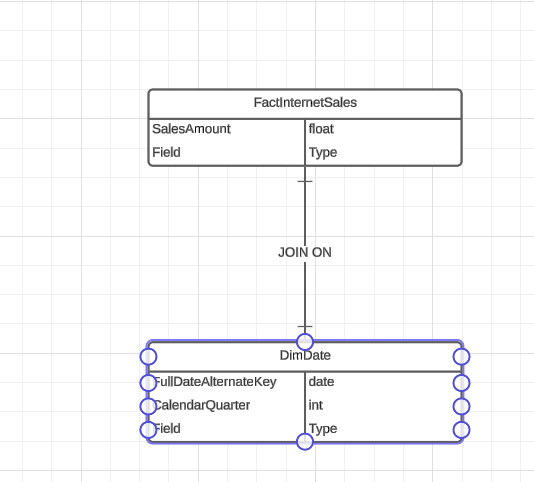

### **Q9 (Complex)**

Write a query that identifies trends in employee salaries over time, including promotions and department changes.

**Tables Involved:** Audit.VersionedEmployeeHistory, HumanResources.Employee


In [36]:
USE Northwinds2022TSQLV7
;WITH SalaryChanges AS (
    SELECT 
    v.EmployeeId, e.EmployeeFirstName + ' ' + e.EmployeeLastName AS EmployeeFullName,  v.Department,  v.Salary,  v.SysStart,
    ROW_NUMBER() OVER (PARTITION BY v.EmployeeId ORDER BY v.SysStart) AS rn
    FROM Audit.VersionedEmployeeHistory v
    JOIN HumanResources.Employee e ON v.EmployeeId = e.EmployeeID)
SELECT EmployeeId, EmployeeFullName, Department, Salary, SysStart
FROM SalaryChanges
WHERE  rn = 1;



(6 rows affected)

Total execution time: 00:00:00.014

EmployeeId EmployeeFullName Department Salary SysStart 1 Sara Davis IT 52500.00 2021-11-21 16:37:51 2 Don Funk HR 45000.00 2021-11-21 16:37:51 3 Judy Lew Sales 55000.00 2021-11-21 16:37:51 4 Yael Peled Marketing 55000.00 2021-11-21 16:37:51 5 Sven Mortensen IT 77250.00 2021-11-21 16:37:51 6 Paul Suurs Sales 40000.00 2021-11-21 16:37:51

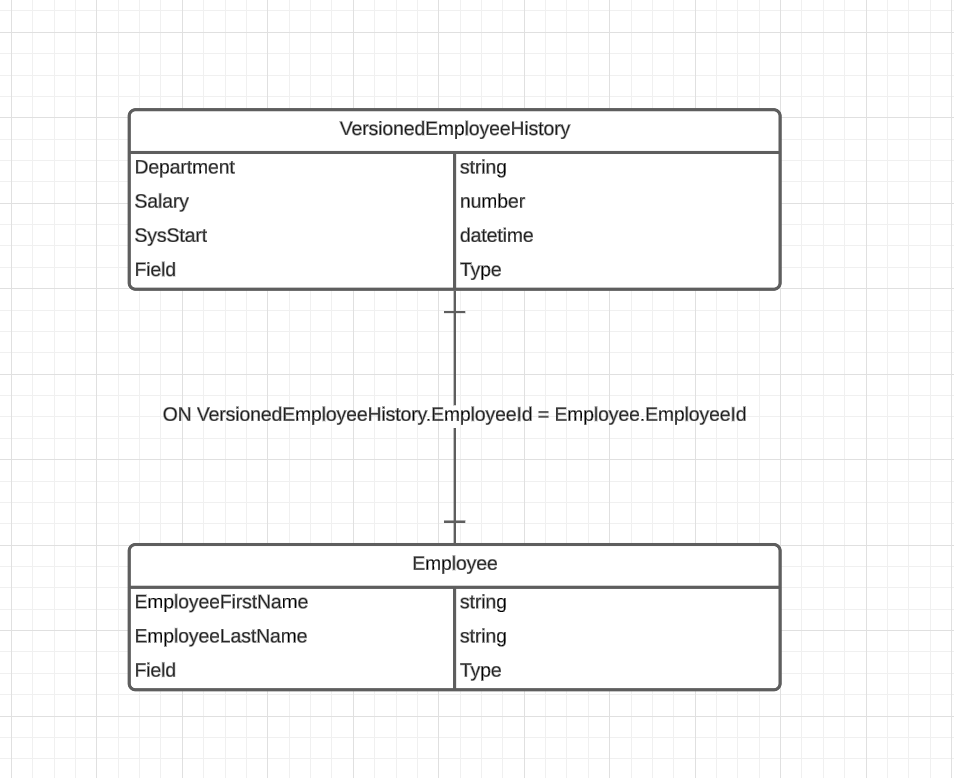

### **Q11 (Medium)**

Write a query that provides the details of the most recent orders for each customer, including order date and total order value.

**Tables Involved:** Sales.Order, Sales.OrderDetail, Sales.Customer


In [40]:
USE Northwinds2022TSQLV7
;WITH RecentOrders AS (
    SELECT c.CustomerId, c.CustomerCompanyName, o.OrderId, o.OrderDate,
           SUM(od.UnitPrice * od.Quantity) AS TotalOrderValue,
           ROW_NUMBER() OVER (PARTITION BY c.CustomerId ORDER BY o.OrderDate DESC) AS rn
    FROM Sales.Customer c
    JOIN Sales.[Order] o ON c.CustomerId = o.CustomerId
    JOIN Sales.OrderDetail od ON o.OrderId = od.OrderId
    GROUP BY c.CustomerId, c.CustomerCompanyName, o.OrderId, o.OrderDate)
SELECT CustomerId, CustomerCompanyName, OrderId, OrderDate, TotalOrderValue
FROM RecentOrders
WHERE rn = 1;


(89 rows affected)

Total execution time: 00:00:00.056

CustomerId CustomerCompanyName OrderId OrderDate TotalOrderValue 1 Customer NRZBB 11011 2016-04-09 960.00 2 Customer MLTDN 10926 2016-03-04 514.40 3 Customer KBUDE 10856 2016-01-28 660.00 4 Customer HFBZG 11016 2016-04-10 491.50 5 Customer HGVLZ 10924 2016-03-04 2034.50 6 Customer XHXJV 11058 2016-04-29 858.00 7 Customer QXVLA 10826 2016-01-12 730.00 8 Customer QUHWH 10970 2016-03-24 280.00 9 Customer RTXGC 11076 2016-05-06 1057.00 10 Customer EEALV 11048 2016-04-24 525.00 11 Customer UBHAU 11023 2016-04-14 1500.00 12 Customer PSNMQ 11054 2016-04-28 305.00 13 Customer VMLOG 10259 2014-07-18 100.80 14 Customer WNMAF 11041 2016-04-22 1887.00 15 Customer JUWXK 11042 2016-04-22 405.75 16 Customer GYBBY 10848 2016-01-23 931.50 17 Customer FEVNN 11067 2016-05-04 86.85 18 Customer BSVAR 10890 2016-02-16 860.10 19 Customer RFNQC 11056 2016-04-28 3740.00 20 Customer THHDP 11072 2016-05-05 5218.00 21 Customer KIDPX 10725 2015-10-31 287.80 23 Customer WVFAF 10789 2015-12-22 3687.00 24 Customer CYZTN 11050 2016-04-27 900.00 25 Customer AZJED 11012 2016-04-09 2974.00 26 Customer USDBG 10971 2016-03-24 1733.06 27 Customer WMFEA 11060 2016-04-30 266.00 28 Customer XYUFB 10963 2016-03-19 68.00 29 Customer MDLWA 10928 2016-03-05 137.50 30 Customer KSLQF 11037 2016-04-21 60.00 31 Customer YJCBX 11049 2016-04-24 342.00 32 Customer YSIQX 11061 2016-04-30 510.00 33 Customer FVXPQ 10785 2015-12-18 387.50 34 Customer IBVRG 11052 2016-04-27 1665.00 35 Customer UMTLM 11055 2016-04-28 1727.50 36 Customer LVJSO 10660 2015-09-08 1701.00 37 Customer FRXZL 11063 2016-04-30 1445.50 38 Customer LJUCA 10933 2016-03-06 920.60 39 Customer GLLAG 11028 2016-04-16 2160.00 40 Customer EFFTC 10972 2016-03-24 251.50 41 Customer XIIWM 11051 2016-04-27 45.00 42 Customer IAIJK 10810 2016-01-01 187.00 43 Customer UISOJ 10545 2015-05-22 210.00 44 Customer OXFRU 11070 2016-05-05 1873.50 45 Customer QXPPT 10884 2016-02-12 1450.60 46 Customer XPNIK 11071 2016-05-05 510.00 47 Customer PSQUZ 11039 2016-04-21 3090.00 48 Customer DVFMB 11018 2016-04-13 1575.00 49 Customer CQRAA 10950 2016-03-16 110.00 50 Customer JYPSC 11004 2016-04-07 295.38 51 Customer PVDZC 10724 2015-10-30 638.50 52 Customer PZNLA 10945 2016-03-12 245.00 53 Customer GCJSG 11057 2016-04-29 45.00 54 Customer TDKEG 10986 2016-03-30 2220.00 55 Customer KZQZT 11034 2016-04-20 554.40 56 Customer QNIVZ 11020 2016-04-14 744.00 58 Customer AHXHT 11073 2016-05-05 300.00 59 Customer LOLJO 11053 2016-04-27 3658.75 60 Customer QZURI 11007 2016-04-08 2633.90 61 Customer WULWD 10989 2016-03-31 1353.60 62 Customer WFIZJ 11068 2016-05-04 2384.80 63 Customer IRRVL 11021 2016-04-14 6941.49 64 Customer LWGMD 11019 2016-04-13 76.00 65 Customer NYUHS 11077 2016-05-06 1374.60 66 Customer LHANT 11062 2016-04-30 508.00 67 Customer QVEPD 11059 2016-04-29 1838.00 68 Customer CCKOT 11075 2016-05-06 586.00 69 Customer SIUIH 11013 2016-04-09 361.00 70 Customer TMXGN 11015 2016-04-10 622.35 71 Customer LCOUJ 11064 2016-05-01 4722.30 72 Customer AHPOP 10869 2016-02-04 1630.00 73 Customer JMIKW 11074 2016-05-06 244.30 74 Customer YSHXL 11043 2016-04-22 210.00 75 Customer XOJYP 10974 2016-03-25 439.00 76 Customer SFOGW 11038 2016-04-21 751.00 77 Customer LCYBZ 10992 2016-04-01 69.60 78 Customer NLTYP 11003 2016-04-06 326.00 79 Customer FAPSM 10967 2016-03-23 910.40 80 Customer VONTK 11069 2016-05-04 360.00 81 Customer YQQWW 10839 2016-01-19 919.50 82 Customer EYHKM 10822 2016-01-08 237.90 83 Customer ZRNDE 10994 2016-04-02 990.00 84 Customer NRCSK 10850 2016-01-23 740.00 85 Customer ENQZT 10739 2015-11-12 240.00 86 Customer SNXOJ 11046 2016-04-23 1564.00 87 Customer ZHYOS 11025 2016-04-15 300.00 88 Customer SRQVM 10935 2016-03-09 700.00 89 Customer YBQTI 11066 2016-05-01 928.75 90 Customer XBBVR 11005 2016-04-07 586.00 91 Customer CCFIZ 11044 2016-04-23 591.60

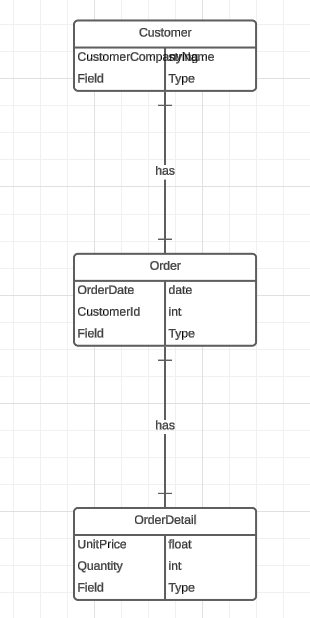

### **Q12 (Medium)**

Write a query that lists employees and their managers along with their respective roles.

**Tables Involved:** HumanResources.Employee

In [45]:
USE Northwinds2022TSQLV7
SELECT e.EmployeeId, e.EmployeeFirstName + ' ' + e.EmployeeLastName AS EmployeeName,
       m.EmployeeId AS ManagerId, m.EmployeeFirstName + ' ' + m.EmployeeLastName AS ManagerName, e.EmployeeTitle
FROM HumanResources.Employee e
LEFT JOIN HumanResources.Employee m ON e.EmployeeManagerId = m.EmployeeId;

(9 rows affected)

Total execution time: 00:00:00.010

EmployeeId EmployeeName ManagerId ManagerName EmployeeTitle 1 Sara Davis NULL NULL CEO 2 Don Funk 1 Sara Davis Vice President, Sales 3 Judy Lew 2 Don Funk Sales Manager 4 Yael Peled 3 Judy Lew Sales Representative 5 Sven Mortensen 2 Don Funk Sales Manager 6 Paul Suurs 5 Sven Mortensen Sales Representative 7 Russell King 5 Sven Mortensen Sales Representative 8 Maria Cameron 3 Judy Lew Sales Representative 9 Patricia Doyle 5 Sven Mortensen Sales Representative

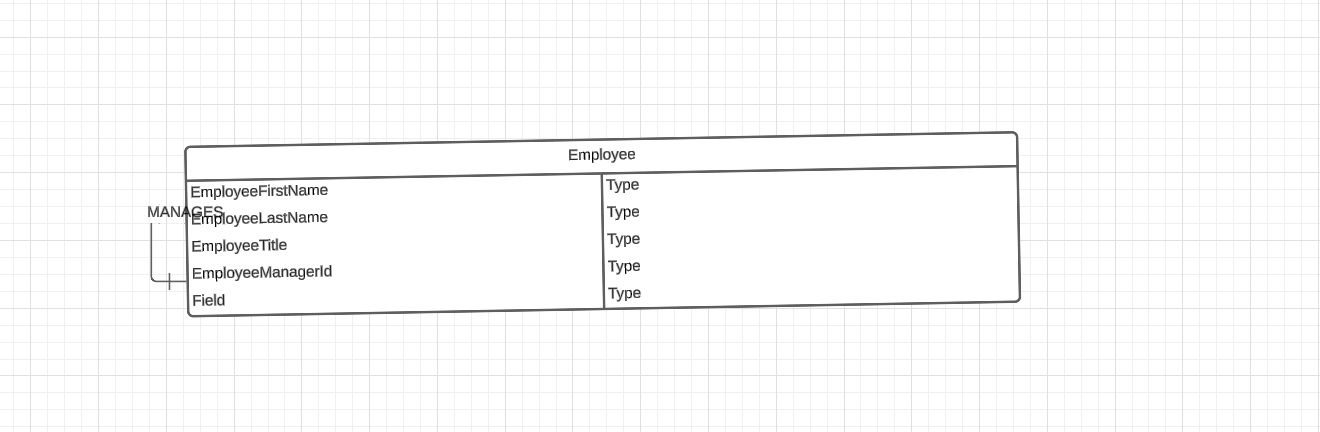

### **Q13 (Complex)**

Write a query that analyzes the sales performance by city, showing the total sales amount, number of customers, and average sale per customer.

**Tables Involved:** Sales.Invoices, Sales.Customers, Application.Cities


In [46]:
USE WideWorldImporters
SELECT 
    c.CityName, 
    COUNT(DISTINCT i.CustomerID) AS NumberOfCustomers, 
    SUM(i.TotalDryItems + i.TotalChillerItems) AS TotalSalesAmount,
    AVG(i.TotalDryItems + i.TotalChillerItems) AS AverageSalePerCustomer
FROM 
    Sales.Invoices i
    JOIN Sales.Customers cust ON i.CustomerID = cust.CustomerID
    JOIN Application.Cities c ON cust.DeliveryCityID = c.CityID
GROUP BY 
    c.CityName;


(655 rows affected)

Total execution time: 00:00:00.603

CityName NumberOfCustomers TotalSalesAmount AverageSalePerCustomer Abbottsburg 1 416 3 Absecon 1 319 3 Accomac 1 368 3 Aceitunas 1 344 3 Airport Drive 1 404 3 Akhiok 2 732 3 Alcester 1 355 3 Alden Bridge 1 355 3 Alstead 1 315 3 Amado 1 379 3 Amanda Park 1 349 3 Andrix 1 356 3 Annamoriah 1 365 3 Antares 1 369 3 Antonito 1 357 3 Arbor Vitae 1 344 3 Argusville 1 382 3 Arietta 1 390 3 Armstrong Creek 1 380 3 Arrow Rock 1 377 3 Arrowbear Lake 1 408 2 Arrowhead Highlands 1 359 3 Asher 1 354 3 Ashland 1 167 3 Ashtabula 1 387 2 Aspen Park 1 335 2 Astor Park 1 356 3 Athol Springs 1 344 3 Avenal 1 380 3 Bakers Mill 1 359 3 Baldwin City 1 295 3 Balko 1 319 3 Baraboo 1 303 3 Basin 1 159 3 Batson 1 386 3 Bayou Cane 1 379 3 Bazemore 1 313 3 Beals 1 326 3 Beaver Bay 1 333 3 Beekmantown 1 346 3 Belgreen 1 339 3 Bell Acres 1 325 3 Ben Arnold 1 380 3 Bergen Park 1 374 3 Bernardston 1 424 3 Bernie 1 334 3 Bernstein 1 410 3 Berville 1 336 3 Bethania 1 382 3 Bethel Acres 1 380 3 Big Moose 1 369 3 Biggs 1 201 3 Biorka 1 268 3 Birds 1 350 3 Biscay 1 342 3 Black Lick 1 371 3 Blackville 1 332 3 Bladenboro 1 297 3 Boalsburg 1 348 3 Bock 1 360 3 Bokeelia 1 375 3 Bombay Beach 1 407 3 Bonner Springs 1 387 3 Bourbonnais 1 416 3 Bourneville 1 428 3 Bow Mar 1 315 3 Bowleys Quarters 1 343 3 Bowlus 1 383 3 Bowmansville 1 45 3 Boyden Arbor 1 375 3 Boynton 1 341 3 Bozeman Hot Springs 1 368 3 Branchburg Park 1 367 3 Branson West 1 358 3 Bratenahl 1 327 3 Bratt 1 340 3 Brookville 1 264 3 Broomtown 1 367 3 Brown City 1 357 3 Bruceton Mills 1 400 3 Buchanan Lake Village 1 339 3 Buell 1 401 3 Byers 1 300 3 Cache 1 358 3 Cadogan 1 360 3 Cale 1 371 3 Calvert City 1 338 3 Cañon 1 389 3 Capa 1 367 3 Cape Neddick 1 339 3 Carbonville 1 341 3 Caro 1 318 3 Caruthers 1 423 3 Caselton 1 374 3 Cataño 1 339 3 Catesby 1 368 3 Caton 1 321 3 Cave Junction 1 324 3 Cavendish 1 372 3 Chalco 1 457 3 Chaseley 1 307 3 Chateaugay 1 386 3 Cherokee 1 271 3 Cherry Grove Beach 2 678 3 Cherryplain 1 242 3 Chetek 1 334 3 Cheyenne Wells 1 381 3 Chipita Park 1 362 3 Claremont 1 253 3 Claycomo 1 355 3 Clewiston 1 322 3 Cloquet 1 353 3 Cloud Lake 1 400 3 Coffeyville 1 373 3 Coin 1 387 3 Cokato 1 299 3 Coker 1 373 3 Colebrook 1 173 3 College Place 1 327 3 Compass Lake 1 366 3 Conesus Lake 1 387 3 Conewango 1 310 3 Coney Island 1 411 3 Connoquenessing 1 380 3 Cookietown 1 326 3 Coosa 1 359 3 Copake 1 339 3 Corcovado 1 337 3 Corfu 1 366 3 Corryton 1 268 3 Cortaro 1 323 3 Cos Cob 1 341 3 Cotuit 1 352 3 Coupland 1 404 3 Cowlington 1 323 2 Coyville 1 337 3 Cramerton 1 418 3 Crary 1 315 3 Creelsboro 1 376 2 Crossroads 1 315 3 Cundiyo 1 346 3 Cuyahoga Heights 1 382 3 Cuyamungue 1 401 3 Cylon 1 407 3 Cypress Quarters 1 348 3 Dacono 1 322 3 Dahlia 1 358 3 Dallardsville 1 343 3 Darling 1 353 3 Dawn 1 341 3 Deer River 1 363 3 Deeson 1 363 3 Del Valle 1 312 3 Delray 1 368 3 Dennis Acres 1 352 3 Devault 1 366 3 Diablock 1 284 3 Dickerson 1 318 3 Dickworsham 1 341 3 Dillon 1 318 3 Donner 1 349 3 Dorchester 1 407 3 Dover 1 229 3 Downingtown 1 349 3 Dracut 1 367 3 Drakesboro 1 299 3 Drumright 1 374 3 Dry Run 1 393 3 Du Quoin 1 367 3 Dundarrach 1 325 3 Dunkerton 1 376 3 Eagle Valley 1 373 3 East Dailey 1 298 3 East Fultonham 2 741 3 East Mountain 1 332 3 East Portal 1 353 3 Eastchester 1 372 3 Eden Valley 1 323 3 Edgartown 1 366 3 Edgecomb 1 333 3 Edmund 1 308 3 Ekron 1 344 3 Ekwok 1 335 3 El Centro 1 358 3 El Refugio 1 317 3 Elbing 1 414 3 Elk Garden 1 389 3 Elkatawa 1 390 3 Ellisville 1 30 3 Elrosa 1 343 3 Elverson 1 381 3 Esopus 1 384 3 Eulaton 1 339 3 Ewart 1 329 3 Ewen 1 355 3 Fairfield Glade 1 345 3 Federalsburg 1 418 3 Ferney 1 368 3 Fieldbrook 1 405 3 Fishtail 1 295 3 Flanagan 1 339 3 Flomaton 1 310 3 Florahome 1 155 3 Floriston 1 346 3 Flowella 1 369 3 Fortville 1 355 3 Francis Mills 1 306 3 Frankewing 1 412 3 Frenchburg 1 374 3 Furley 1 402 3 Gallipolis Ferry 1 239 3 Gardere 1 394 3 Gardners 1 337 3 Gargatha 1 320 3 Garlin 1 333 3 Gasport 1 384 3 Gassaway 1 298 3 Gilford 1 371 3 Glancy 1 302 3 Glen Avon 1 

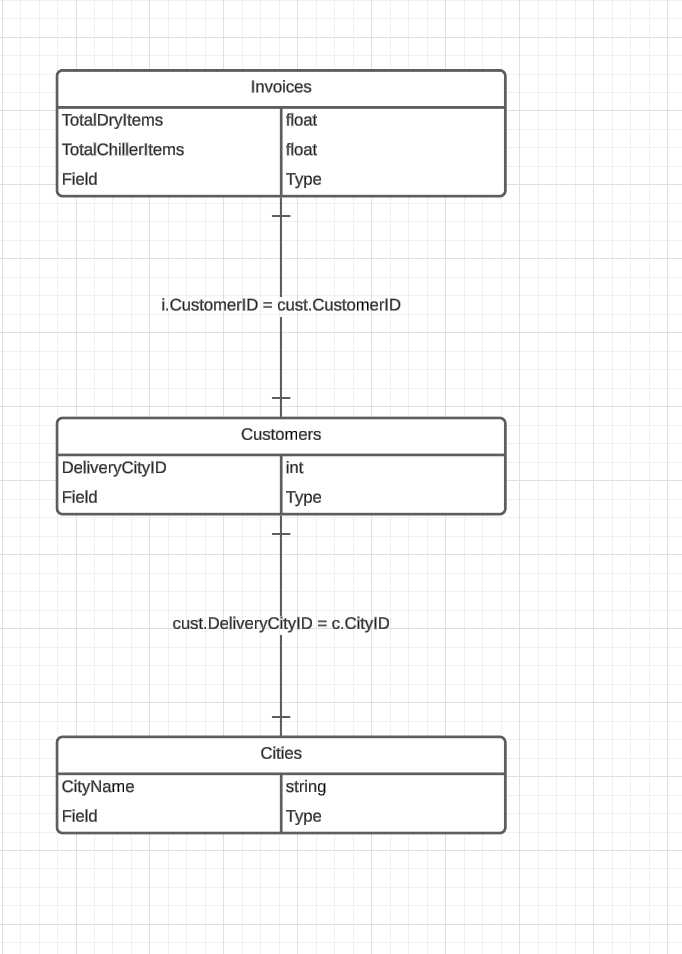

### **Q14 (Medium)**

Write a query that details the purchase order history for each supplier, including average order value and time to delivery.

**Tables Involved:** Purchasing.PurchaseOrders, Purchasing.PurchaseOrderLines, Purchasing.Suppliers


In [49]:
USE WideWorldImporters
SELECT 
    s.SupplierName, 
    AVG(DATEDIFF(day, po.OrderDate, po.ExpectedDeliveryDate)) AS AverageTimeToDelivery, 
    AVG(pol.ExpectedUnitPricePerOuter * pol.OrderedOuters) AS AverageOrderValue
FROM 
    Purchasing.Suppliers s
    JOIN Purchasing.PurchaseOrders po ON s.SupplierID = po.SupplierID
    JOIN Purchasing.PurchaseOrderLines pol ON po.PurchaseOrderID = pol.PurchaseOrderID
GROUP BY 
    s.SupplierName;


(7 rows affected)

Total execution time: 00:00:00.050

SupplierName AverageTimeToDelivery AverageOrderValue Graphic Design Institute 16 154.500000 A Datum Corporation 15 2502.300000 Fabrikam, Inc. 19 117148.694932 Northwind Electric Cars 16 4378.694444 The Phone Company 18 3388.000000 Contoso, Ltd. 14 104.500000 Litware, Inc. 19 107733.942874

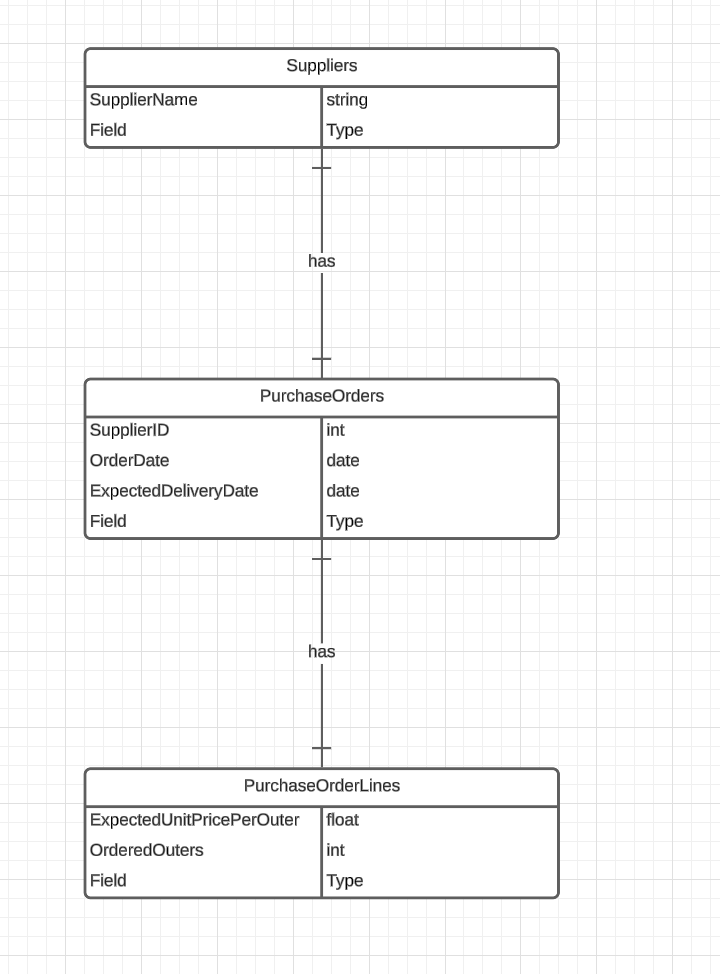

### **Q15 (Medium)**

Write a query that identifies customers who have not made a purchase within the last year but have previously spent above a threshold of $450.

**Tables Involved:** Sales.Customers, Sales.Invoices

In [59]:
USE WideWorldImporters;

SELECT 
    cust.CustomerID, 
    cust.CustomerName 
FROM 
    Sales.Customers cust
LEFT JOIN 
    (SELECT CustomerID, SUM(TotalDryItems + TotalChillerItems) AS TotalAmount 
     FROM Sales.Invoices 
     WHERE InvoiceDate < DATEADD(YEAR, -1, GETDATE()) 
     GROUP BY CustomerID 
     HAVING SUM(TotalDryItems + TotalChillerItems) > 450) AS HistoricalInvoices ON cust.CustomerID = HistoricalInvoices.CustomerID
LEFT JOIN 
    (SELECT CustomerID 
     FROM Sales.Invoices 
     WHERE InvoiceDate >= DATEADD(YEAR, -1, GETDATE()) 
     GROUP BY CustomerID) AS RecentInvoices ON cust.CustomerID = RecentInvoices.CustomerID
WHERE 
    RecentInvoices.CustomerID IS NULL AND HistoricalInvoices.CustomerID IS NOT NULL;



(3 rows affected)

Total execution time: 00:00:00.114

CustomerID CustomerName 185 Tailspin Toys (Vidrine, LA) 804 Aleksandrs Riekstins 831 Bhaavan Rai

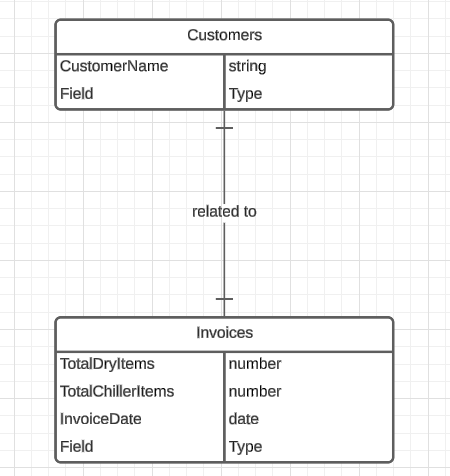

### **Q16 (Medium)**

Write a query that provides stock level trends for selected high-value items over the last recorded year.

**Tables Involved:** Warehouse.StockItemHoldings, Warehouse.StockItems, Warehouse.StockItemTransactions

In [105]:
USE WideWorldImporters

SELECT 
    si.StockItemName, 
    sith.QuantityOnHand, 
    sith.LastEditedWhen
FROM 
    Warehouse.StockItems si
    JOIN Warehouse.StockItemHoldings sith ON si.StockItemID = sith.StockItemID
WHERE 
    si.UnitPrice > 1000
    AND sith.LastEditedWhen >= DATEADD(YEAR, -8, GETDATE())
ORDER BY 
    si.StockItemName, 
    sith.LastEditedWhen;


(1 row affected)

Total execution time: 00:00:00.009

StockItemName QuantityOnHand LastEditedWhen Air cushion machine (Blue) 12530 2016-05-31 12:00:00.0000000

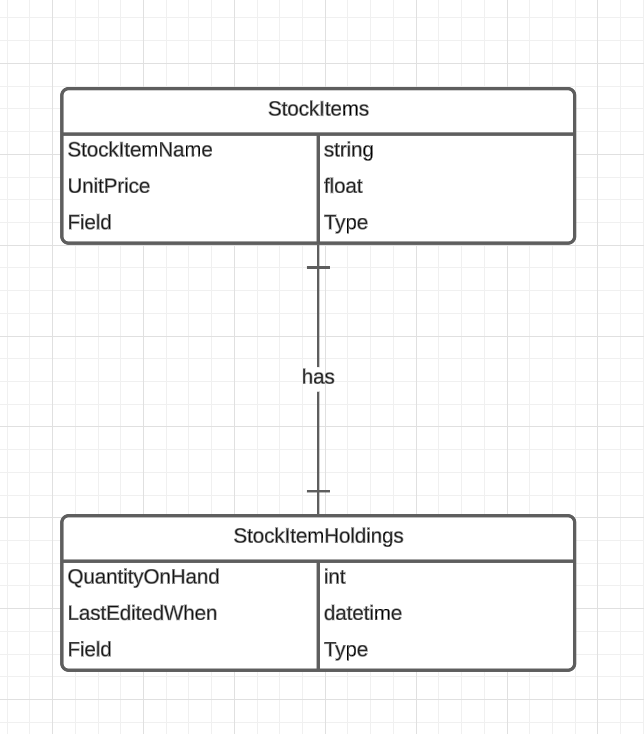

### **Q20 (Medium)**

Write a query that shows the stock level history of items identified as chiller stock, including the last recorded stocktake quantity and current quantity on hand, filtered by their lead time days being less than a specified value.

**Tables Involved:** Fact.Stock Holding, Dimension.Date, Dimension.Stock Item


In [114]:
USE WideWorldImportersDW;
SELECT 
    si.[Stock Item], 
    sh.[Quantity On Hand], 
    sh.[Last Stocktake Quantity]
FROM 
    Fact.[Stock Holding] sh 
    JOIN Dimension.[Stock Item] si ON sh.[Stock Item Key] = si.[Stock Item Key]
WHERE 
    si.[Is Chiller Stock] = 1 AND si.[Lead Time Days] < 200 
ORDER BY 
    si.[Stock Item];




(8 rows affected)

Total execution time: 00:00:00.036

Stock Item Quantity On Hand Last Stocktake Quantity Chocolate beetles 250g 69336 56568 Chocolate echidnas 250g 74256 58464 Chocolate frogs 250g 67488 53136 Chocolate sharks 250g 119560 95920 Novelty chilli chocolates 250g 90360 71112 Novelty chilli chocolates 500g 48228 38748 White chocolate moon rocks 250g 245352 193848 White chocolate snow balls 250g 155856 122544

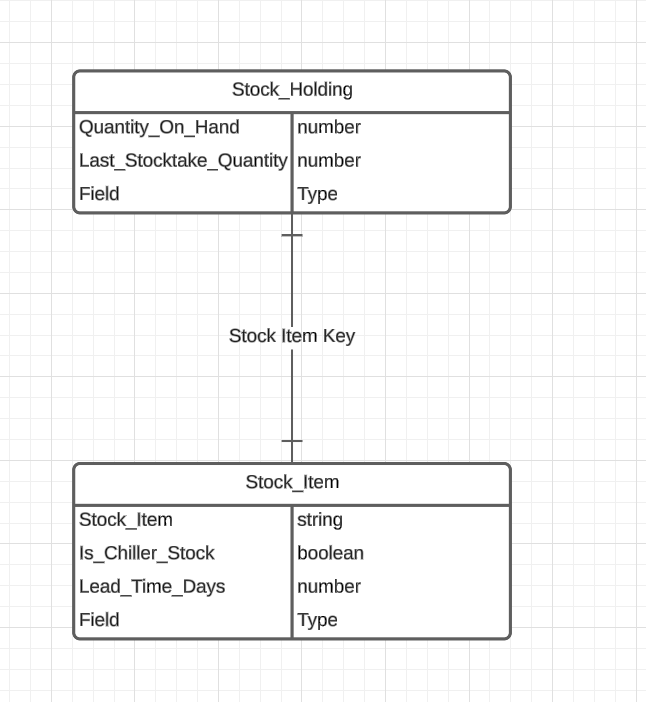